# 1. Load Data Sets 

In [55]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime, timedelta

In [3]:
u_cursos_sem1=pd.read_csv('C:/Users/sorel/Desktop/Learning Analytics/Data Sets/ucursos_sem1.csv')
u_cursos_sem2=pd.read_csv('C:/Users/sorel/Desktop/Learning Analytics/Data Sets/ucursos_sem2.csv')
grades_sem1_sem2=pd.read_csv('C:/Users/sorel/Desktop/Learning Analytics/Data Sets/notas_i_ii_2017.csv')
socio_demographic=pd.read_csv('C:/Users/sorel/Desktop/Learning Analytics/Data Sets/socio_2017.csv')

C:\Users\sorel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# DATA CLEANING: u_cursos_sem1 and u_cursos_sem2

# 2. Data Wrangling

## 2.1 Renaming Features 

In [4]:
u_cursos_sem1.rename({'rut_encryp':'STUDENT_ID', 'GRU_ID':'GRU_ID', 'SESSION':'SESSION_ID', 'OPERACION':'OPERATION_TYPE', 'FECHA':'AUX_DATE',
                      'IP':'IP', 'TEXTO':'TEXT', 'URL':'URL', 'modulo':'MODULE', 'curso':'COURSE', 'semester':'SEMESTER', 'year':'YEAR',
                      'seccion':'SECTION', 'evento':'EVENT', 'categoria':'INTERACTION', 'accion':'INTERACTION_TYPE'}, axis=1, inplace = True)

u_cursos_sem2.rename({'rut_encryp':'STUDENT_ID', 'GRU_ID':'GRU_ID', 'SESSION':'SESSION_ID', 'OPERACION':'OPERATION_TYPE', 'FECHA':'AUX_DATE',
                      'IP':'IP', 'TEXTO':'TEXT', 'URL':'URL', 'modulo':'MODULE', 'curso':'COURSE', 'semester':'SEMESTER', 'year':'YEAR',
                      'seccion':'SECTION', 'evento':'EVENT', 'categoria':'INTERACTION', 'accion':'INTERACTION_TYPE'}, axis=1, inplace = True)

grades_sem1_sem2.rename({'rut_encryp':'STUDENT_ID', 'sigla':'COURSE_CODE', 'seccion':'SECTION', 'id_curso':'COURSE_ID', 'year':'YEAR',
                      'semestre':'SEMESTER', 'categoria_eval':'EVALUATION_TYPE', 'evaluacion_tipo':'EVALUATION_DESCRIPTION', 'nota':'GRADE', 'fecha':'DATE'}, axis=1, inplace = True)

socio_demographic.rename({'rut_encryp':'STUDENT_ID', 'sexo':'GENDER', 'sem_en_curso':'ACTUAL_SEMESTER', 'ano_en_curso':'ACTUAL_YEAR', 
                      'ano_ingreso':'ENTRY_YEAR', 'tipo_colegio':'SCHOOL_TYPE', 'dependencia_colegio':'SCHOOL_DEPENDANCE','nombre_colegio':'SCHOOL_NAME',  
                      'nem':'HIGHSCHOOL_GRADE_AVG','psu_ranking':'PSU_SCORE', 'psu_matematicas':'MATH_SCORE', 'psu_lenguaje':'LANGUAGE_SCORE', 
                      'psu_ciencias':'SCIENCE_SCORE','psu_historia':'HISTORY_SCORE', 
                      'psu_ponderado':'WEIGTHED_AVG_SCORE', 'tipo_ingreso':'ENTRY_TYPE','tipo_ingreso_categoria':'ENTRY_TYPE_DESCRIPTION', 
                      'educ_madre':'MOTHER_EDUCATION_LEVEL', 'educ_padre':'FATHER_EDUCATION_LEVEL',
                      'cursos_inscritos':'SIGNED_COURSES', 'cursos_aprobados':'PASSED_COURSES', 'cursos_reprobados':'FAILED_COURSES',
                      'creditos_inscritos':'SIGNED_CREDITS', 'creditos_reprobados':'FAILED_CREDITS', 'nota_sem':'SEMESTER_FINAL_GRADE'}, axis=1, inplace = True)

In [5]:
##2.2 Drop Interaction and Interaction Type
u_cursos_sem1.drop(['INTERACTION', 'INTERACTION_TYPE'], axis=1, inplace=True)
u_cursos_sem2.drop(['INTERACTION', 'INTERACTION_TYPE'], axis=1, inplace=True)

## 2.2 Map Interaction Features

In [6]:
Content_Academic=['biblio/', 'biblioobjeto.php/', 'enlaces/', 'enlacesobjeto.php/', 'material_alumnos/',
'material_alumnosbajar/', 'material_alumnosobjeto.php/', 'material_docente/', 'material_docentebajar/', 
'material_docenteprevisualizar/']

Content_Administrative=['buscador/', 'calendario/', 'calendariodia/', 'calendarioicalendar/', 'calendariomes/', 'calendarioobjeto.php/',
'calendarioresumen/', 'calendariosemana/', 'novedades/', 'novedadesobjeto.php/']

Read_Comment=['blog/', 'blogobjeto.php/', 'correo/', 'encuestas/', 'encuestasencuesta/',
'encuestasobjeto.php/', 'foro/', 'foromis_mensajes/', 'foroobjeto.php/',
'votaciones/', 'votacionesobjeto.php/']

Write_Comment=['blog/comentar', 'blogpost/guardar', 'correoenviar/', 'correoenviar/enviar', 'encuestasencuesta/guardar',
'foroeditar/', 'foroeditar/guardar', 'foromensaje/', 'foromensaje/guardar', 'material_alumnosagregar/',
'material_alumnosagregar/guardar', 'votacionesobjeto.php/votar']

Evaluations_Interactions=['tareas/','tareasINTENTO_ENTREGA','tareasbajar/','tareasdetalle/','tareasdetalle/entregar','tareashistorial/bajar','tareasobjeto.php/',
'utests/','utestsobjeto.php/','utestspregunta/entregar','utestspregunta/responder','uteststest/comenzar']

Active=['biblioobjeto.php/','blog/comentar','blogobjeto.php/','blogpost/guardar','calendarioicalendar/','calendarioobjeto.php/','correoenviar/',
        'correoenviar/enviar','encuestasencuesta/guardar','foroeditar/','foroeditar/guardar','foromensaje/','foromensaje/guardar','foroobjeto.php/',
        'material_alumnosagregar/','material_alumnosagregar/guardar','material_docentebajar/','tareasINTENTO_ENTREGA','utestspregunta/entregar','utestspregunta/responder',
        'uteststest/comenzar','votacionesobjeto.php/votar']

Pasive=['biblio/','blog/','buscador/','calendario/','calendariodia/','calendariomes/','calendarioresumen/','calendariosemana/','correo/','encuestas/','encuestasencuesta/',
        'encuestasobjeto.php/','enlaces/','enlacesobjeto.php/','foro/','foromis_mensajes/','material_alumnos/','material_alumnosbajar/','material_alumnosobjeto.php/',
        'material_docente/','material_docenteprevisualizar/','novedades/','novedadesobjeto.php/','tareas/','tareasbajar/','tareasdetalle/','tareasdetalle/entregar',
        'tareashistorial/bajar','tareasobjeto.php/','utests/','utestsobjeto.php/','votaciones/','votacionesobjeto.php/']

In [7]:
u_cursos_sem1['INTERACTION_TYPE']=u_cursos_sem1[['MODULE', 'OPERATION_TYPE']].apply(lambda x: ''.join(x), axis=1)
u_cursos_sem2['INTERACTION_TYPE']=u_cursos_sem2[['MODULE', 'OPERATION_TYPE']].apply(lambda x: ''.join(x), axis=1)


## 2.3 Compute Interaction Categorical Features

In [8]:
# 2.3.1 Interaction Features for semester 1
cond1_1=u_cursos_sem1['INTERACTION_TYPE'].isin(Content_Academic)
cond1_2=u_cursos_sem1['INTERACTION_TYPE'].isin(Content_Administrative)
cond1_3=u_cursos_sem1['INTERACTION_TYPE'].isin(Read_Comment)
cond1_4=u_cursos_sem1['INTERACTION_TYPE'].isin(Write_Comment)
u_cursos_sem1['INTERACTION']=np.where(cond1_1, 'Content_Academic',
                                     np.where(cond1_2, 'Content_Administrative',
                                     np.where(cond1_3, 'Read_Comment',
                                     np.where(cond1_4, 'Write_Comment', 'Evaluations_Interactions'
                                              ))))

# 2.3.2 Interaction features for semester 2
cond2_1=u_cursos_sem2['INTERACTION_TYPE'].isin(Content_Academic)
cond2_2=u_cursos_sem2['INTERACTION_TYPE'].isin(Content_Administrative)
cond2_3=u_cursos_sem2['INTERACTION_TYPE'].isin(Read_Comment)
cond2_4=u_cursos_sem2['INTERACTION_TYPE'].isin(Write_Comment)

u_cursos_sem2['INTERACTION']=np.where(cond2_1, 'Content_Academic',
                                     np.where(cond2_2, 'Content_Administrative',
                                     np.where(cond2_3, 'Read_Comment',
                                     np.where(cond2_4, 'Write_Comment', 'Evaluations_Interactions'
                                              ))))


In [9]:
# 2.3.3 Passive/Active Interaction sem 1
cond1_6=u_cursos_sem1['INTERACTION_TYPE'].isin(Active)
u_cursos_sem1['INTERACTION_TYPE']=np.where(cond1_6, 'Active', 'Pasive')
# 2.3.4 Passive/Active Interaction sem 2
cond2_6=u_cursos_sem2['INTERACTION_TYPE'].isin(Active)
u_cursos_sem2['INTERACTION_TYPE']=np.where(cond2_6, 'Active', 'Pasive')

## 2.4 Map AUX_DATE to Date format

In [10]:
u_cursos_sem1[(u_cursos_sem1['COURSE']=='MA1001')].tail()

,Unnamed: 0,STUDENT_ID,GRU_ID,SESSION_ID,OPERATION_TYPE,AUX_DATE,IP,TEXT,URL,MODULE,COURSE,SEMESTER,YEAR,SECTION,EVENT,INTERACTION_TYPE,INTERACTION
1232185,1232186,0deb5543840fde819704d1077e859595,curso.223013,1ka8e3fqdjgnjt9jcquo5tgt81,/,2017-12-17 16:32:23,181.75.93.207,array (\n '_q' => 'ingenieria/2017/2/MA1001/2...,NaN,notas,MA1001,2,2017,2,notas_/,Pasive,Evaluations_Interactions
1232186,1232187,0a3a1961169be4bcf5d131354ffdb8e0,curso.223013,l9dqfdt66hm6igdqpud71qov75,notas/,2017-12-18 11:19:12,172.17.67.15,array (\n '_q' => 'ingenieria/2017/2/MA1001/2...,NaN,notas,MA1001,2,2017,2,notas_notas/,Pasive,Evaluations_Interactions
1232187,1232188,0a3a1961169be4bcf5d131354ffdb8e0,curso.223013,l9dqfdt66hm6igdqpud71qov75,/,2017-12-18 11:20:20,172.17.67.15,array (\n '_q' => 'ingenieria/2017/2/MA1001/2...,NaN,notas,MA1001,2,2017,2,notas_/,Pasive,Evaluations_Interactions
1232188,1232189,0a3a1961169be4bcf5d131354ffdb8e0,curso.223013,l9dqfdt66hm6igdqpud71qov75,/,2017-12-18 11:21:32,172.17.67.15,array (\n '_q' => 'ingenieria/2017/2/MA1001/2...,NaN,notas,MA1001,2,2017,2,notas_/,Pasive,Evaluations_Interactions
1232189,1232190,51f37cab7769346eca474c38daa35da6,curso.223013,dqenlmqg993o22ibnems6q35r0,/,2017-12-20 12:03:12,191.115.16.175,array (\n '_q' => 'ingenieria/2017/2/MA1001/2...,NaN,notas,MA1001,2,2017,2,notas_/,Pasive,Evaluations_Interactions


In [11]:
# 2.4.1 Sem1 Map AUX_DATE to Date
u_cursos_sem1['TIMESTAMP']=pd.to_datetime(u_cursos_sem1['AUX_DATE'])
u_cursos_sem1['DATE']=u_cursos_sem1['TIMESTAMP'].dt.date
u_cursos_sem1['Final_Date']=pd.to_datetime(u_cursos_sem1['DATE'])
# 2.4.2 Sem2 Map AUX_DATE to Date
u_cursos_sem2['TIMESTAMP']=pd.to_datetime(u_cursos_sem2['AUX_DATE'])
u_cursos_sem2['DATE']=u_cursos_sem2['TIMESTAMP'].dt.date
u_cursos_sem2['Final_Date']=pd.to_datetime(u_cursos_sem2['DATE'])

In [12]:
df_ucursos_sem1=u_cursos_sem1[['Unnamed: 0', 'STUDENT_ID', 'GRU_ID', 'SESSION_ID', 'IP', 'COURSE', 'SEMESTER', 'YEAR', 'SECTION', 'INTERACTION', 'INTERACTION_TYPE', 'Final_Date']]
df_ucursos_sem2=u_cursos_sem2[['Unnamed: 0','STUDENT_ID', 'GRU_ID', 'SESSION_ID', 'IP', 'COURSE', 'SEMESTER', 'YEAR', 'SECTION', 'INTERACTION', 'INTERACTION_TYPE', 'Final_Date']]

In [13]:
df_ucursos_sem1.dtypes

Unnamed: 0                   int64
STUDENT_ID                  object
GRU_ID                      object
SESSION_ID                  object
IP                          object
COURSE                      object
SEMESTER                     int64
YEAR                         int64
SECTION                      int64
INTERACTION                 object
INTERACTION_TYPE            object
Final_Date          datetime64[ns]
dtype: object

## 2.5 Subset 'MA1001' and 'MA1101' for both semesters

In [14]:
df_ucursos_sem1=df_ucursos_sem1[((df_ucursos_sem1['COURSE'] == 'MA1001') & (df_ucursos_sem1['SEMESTER']==1)) | ((df_ucursos_sem1['COURSE'] == 'MA1101')  & (df_ucursos_sem1['SEMESTER']==1))]
df_ucursos_sem2=df_ucursos_sem2[((df_ucursos_sem2['COURSE'] == 'MA1002')  & (df_ucursos_sem2['SEMESTER']==2)) | ((df_ucursos_sem2['COURSE'] == 'MA1102')  & (df_ucursos_sem2['SEMESTER']==2))]

In [15]:
df_ucursos_sem2['COURSE'].unique(), df_ucursos_sem1['COURSE'].unique()

(array(['MA1002', 'MA1102'], dtype=object),
 array(['MA1101', 'MA1001'], dtype=object))

In [65]:
df_ucursos_sem1[(df_ucursos_sem1['COURSE'] == 'MA1101')].head()

,Unnamed: 0,STUDENT_ID,GRU_ID,SESSION_ID,IP,COURSE,SEMESTER,YEAR,SECTION,INTERACTION,INTERACTION_TYPE,Final_Date,Evaluation_Features_MA1101,Evaluation_Features_MA1001
34365,34366,bd42d977448d5766074db17eb8f9de8d,curso.198103,epjdogmf9ogptr4u459ea3b3a6,201.241.120.181,MA1101,1,2017,7,Write_Comment,Active,2017-01-29,NaN,NaN
34377,34378,3f6d5f7d3d4c2cb68d70cb0dbe6a005a,curso.198377,hf74bcin12flc905s521pobm56,191.112.29.217,MA1101,1,2017,1,Write_Comment,Active,2017-01-25,NaN,NaN
34378,34379,b97040e76822667215e2c13681b4eb1a,curso.198385,ted9vqqi2eq617p0n9qi08dao2,201.246.154.242,MA1101,1,2017,5,Read_Comment,Pasive,2017-01-25,NaN,NaN
34394,34395,43ac267ae6f66650fd1c3eccd81ff1b2,curso.198103,t6cl7cq61go4gpoks5b0c3os37,191.115.147.137,MA1101,1,2017,7,Read_Comment,Pasive,2017-02-27,NaN,NaN
34395,34396,43ac267ae6f66650fd1c3eccd81ff1b2,curso.198103,t6cl7cq61go4gpoks5b0c3os37,191.115.147.137,MA1101,1,2017,7,Read_Comment,Pasive,2017-02-27,NaN,NaN


## 2.6 Compute Evaluation Feature for semester 1 (need to obtain certified dates for semester 2)

In [17]:
# 2.6.1 Create Empty Columns
df_ucursos_sem1['Evaluation_Features_MA1101']=None
df_ucursos_sem1['Evaluation_Features_MA1001']=None
# 2.6.2 Evaluation Date Dictionaries
MA1101_Evaluation_Dates = {pd.to_datetime("2017-04-21"):'C1', 
                           pd.to_datetime("2017-05-02"):'C2',
                           pd.to_datetime("2017-05-11"):'C3',
                           pd.to_datetime("2017-06-01"):'C4',
                           pd.to_datetime("2017-06-15"):'C5',
                           pd.to_datetime("2017-06-30"):'C6',
                           pd.to_datetime("2017-05-26"):'CR',
                           pd.to_datetime("2017-07-13"):'EX',
                           
                           pd.to_datetime("2017-04-21")- timedelta(days=2):'Cum1IntC1', 
                           pd.to_datetime("2017-05-02")- timedelta(days=2):'Cum1IntC2',
                           pd.to_datetime("2017-05-11")- timedelta(days=2):'Cum1IntC3',
                           pd.to_datetime("2017-06-01")- timedelta(days=2):'Cum1IntC4',
                           pd.to_datetime("2017-06-15")- timedelta(days=2):'Cum1IntC5',
                           pd.to_datetime("2017-06-30")- timedelta(days=2):'Cum1IntC6',
                           pd.to_datetime("2017-05-26")- timedelta(days=2):'Cum1IntCR',
                           pd.to_datetime("2017-07-13")- timedelta(days=2):'Cum1IntEX',
                           
                           pd.to_datetime("2017-04-21")- timedelta(days=5):'Cum2IntC1', 
                           pd.to_datetime("2017-05-02")- timedelta(days=5):'Cum2IntC2',
                           pd.to_datetime("2017-05-11")- timedelta(days=5):'Cum2IntC3',
                           pd.to_datetime("2017-06-01")- timedelta(days=5):'Cum2IntC4',
                           pd.to_datetime("2017-06-15")- timedelta(days=5):'Cum2IntC5',
                           pd.to_datetime("2017-06-30")- timedelta(days=5):'Cum2IntC6',
                           pd.to_datetime("2017-05-26")- timedelta(days=5):'Cum2IntCR',
                           pd.to_datetime("2017-07-13")- timedelta(days=5):'Cum2IntEX',
                          
                           pd.to_datetime("2017-04-21")- timedelta(days=10):'Cum3IntC1', 
                           pd.to_datetime("2017-05-02")- timedelta(days=10):'Cum3IntC2',
                           pd.to_datetime("2017-05-11")- timedelta(days=10):'Cum3IntC3',
                           pd.to_datetime("2017-06-01")- timedelta(days=10):'Cum3IntC4',
                           pd.to_datetime("2017-06-15")- timedelta(days=10):'Cum3IntC5',
                           pd.to_datetime("2017-06-30")- timedelta(days=10):'Cum3IntC6',
                           pd.to_datetime("2017-05-26")- timedelta(days=10):'Cum3IntCR',
                           pd.to_datetime("2017-07-13")- timedelta(days=10):'Cum3IntEX' 
                          
                          }

MA1001_Evaluation_Dates =  {pd.to_datetime("2017-04-21"):'C1',
                            pd.to_datetime("2017-05-02"):'C2',
                            pd.to_datetime("2017-05-11"):'C3',
                            pd.to_datetime("2017-06-05"):'C4',
                            pd.to_datetime("2017-06-16"):'C5',
                            pd.to_datetime("2017-06-29"):'C6',
                            pd.to_datetime("2017-05-24"):'CR',
                            pd.to_datetime("2017-07-06"):'EX', 
                           
                            pd.to_datetime("2017-04-21")- timedelta(days=2):'Cum1IntC1',
                            pd.to_datetime("2017-05-02")- timedelta(days=2):'Cum1IntC2',
                            pd.to_datetime("2017-05-11")- timedelta(days=2):'Cum1IntC3',
                            pd.to_datetime("2017-06-05")- timedelta(days=2):'Cum1IntC4',
                            pd.to_datetime("2017-06-16")- timedelta(days=2):'Cum1IntC5',
                            pd.to_datetime("2017-06-29")- timedelta(days=2):'Cum1IntC6',
                            pd.to_datetime("2017-05-24")- timedelta(days=2):'Cum1IntCR',
                            pd.to_datetime("2017-07-06")- timedelta(days=2):'Cum1IntEX',
                           
                            pd.to_datetime("2017-04-21")- timedelta(days=5):'Cum2IntC1',
                            pd.to_datetime("2017-05-02")- timedelta(days=5):'Cum2IntC2',
                            pd.to_datetime("2017-05-11")- timedelta(days=5):'Cum2IntC3',
                            pd.to_datetime("2017-06-05")- timedelta(days=5):'Cum2IntC4',
                            pd.to_datetime("2017-06-16")- timedelta(days=5):'Cum2IntC5',
                            pd.to_datetime("2017-06-29")- timedelta(days=5):'Cum2IntC6',
                            pd.to_datetime("2017-05-24")- timedelta(days=5):'Cum2IntCR',
                            pd.to_datetime("2017-07-06")- timedelta(days=5):'Cum2IntEX',
                           
                            pd.to_datetime("2017-04-21")- timedelta(days=10):'Cum3IntC1',
                            pd.to_datetime("2017-05-02")- timedelta(days=10):'Cum3IntC2',
                            pd.to_datetime("2017-05-11")- timedelta(days=10):'Cum3IntC3',
                            pd.to_datetime("2017-06-05")- timedelta(days=10):'Cum3IntC4',
                            pd.to_datetime("2017-06-16")- timedelta(days=10):'Cum3IntC5',
                            pd.to_datetime("2017-06-29")- timedelta(days=10):'Cum3IntC6',
                            pd.to_datetime("2017-05-24")- timedelta(days=10):'Cum3IntCR',
                            pd.to_datetime("2017-07-06")- timedelta(days=10):'Cum3IntEX'
                           
                        
                           }


df_ucursos_sem1["Evaluation_Features_MA1101"] = df_ucursos_sem1["Final_Date"].apply(lambda x: MA1001_Evaluation_Dates.get(x))
df_ucursos_sem1["Evaluation_Features_MA1001"] = df_ucursos_sem1["Final_Date"].apply(lambda x: MA1101_Evaluation_Dates.get(x))


In [18]:
df_ucursos_sem1["Evaluation_Features_MA1001"].fillna(value=pd.np.nan, inplace=True)
df_ucursos_sem1["Evaluation_Features_MA1101"].fillna(value=pd.np.nan, inplace=True)

#df_ucursos_sem1[df_ucursos_sem1["Evaluation_Features_MA1001"].notnull()]
#df_ucursos_sem1[df_ucursos_sem1["Evaluation_Dates_MA1001"].notnull()]

In [19]:
aux_df=df_ucursos_sem1.filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
aux_df2=pd.get_dummies(aux_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
aux_df2.groupby(
        'STUDENT_ID', as_index=False).agg(
    {
         "INTERACTION_Content_Academic":"sum",    
         "INTERACTION_Content_Administrative": "sum",
         "INTERACTION_Evaluations_Interactions":"sum",
         "INTERACTION_Read_Comment":"sum",
         "INTERACTION_Write_Comment":"sum",
         "INTERACTION_TYPE_Active":"sum",
         "INTERACTION_TYPE_Pasive":"sum"
    }
)

,STUDENT_ID,INTERACTION_Content_Academic,INTERACTION_Content_Administrative,INTERACTION_Evaluations_Interactions,INTERACTION_Read_Comment,INTERACTION_Write_Comment,INTERACTION_TYPE_Active,INTERACTION_TYPE_Pasive
0,0002e36ac2cb3148d6e19a026aa87b8e,154.0,3,175.0,286.0,33.0,330.0,321.0
1,005a64b18d4c7e0ff3f73fcbae139a5e,200.0,0,105.0,230.0,12.0,317.0,230.0
2,006b50c0030008a29eba5599a4ccd1a0,234.0,2,178.0,377.0,16.0,485.0,322.0
3,00a1d3d158e59d948f624496f5f09634,0.0,0,2.0,0.0,0.0,0.0,2.0
4,00b3f73567db65d8494708c2618ee4a3,0.0,0,0.0,2.0,0.0,1.0,1.0
5,00fa2a0e3f725680654a593bf16fb856,259.0,0,294.0,198.0,15.0,334.0,432.0
6,0123a9edaf971fa130ac459604e1f59d,83.0,0,155.0,174.0,5.0,211.0,206.0
7,015841f4abc6eb17b745ebd9c4f09f42,1.0,0,0.0,2.0,0.0,1.0,2.0
8,017111e7b0aa3cafa83009ebd507086c,142.0,2,117.0,106.0,7.0,107.0,267.0
9,01c55b2bb36c165486321f3649d9cf90,40.0,10,54.0,148.0,4.0,40.0,216.0


## 2.7 Filter and Pivot!

In [117]:
#For Loop filtering for every possible Date:
#2.7.1 Define Array of Dates

MA1101_Dates = {'C1':"2017-04-21", 'C2':"2017-05-02", 'C3':"2017-05-11", 
                'C4':"2017-06-01", 'C5':"2017-06-15", 'C6':"2017-06-30", 'CR':"2017-05-26", 'EX':"2017-07-13" }

MA1001_Dates =  {'C1':"2017-04-21", 'C2':"2017-05-02", 'C3':"2017-05-11", 
                            'C4':"2017-06-05", 'C5':"2017-06-16", 'C6':"2017-06-29", 'CR':"2017-05-24",'EX':"2017-07-06"} 

### Total Interactions DataFrame ###
aux_df=df_ucursos_sem1.filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE"])
aux_df2=pd.get_dummies(aux_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
total_df=aux_df2.groupby(
        'STUDENT_ID', as_index=True).agg(  
         Total_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         Total_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         Total_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         Total_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         Total_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         Total_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         Total_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum')
)

########################################################################################################################################################################


In [21]:
#2.7.2 Compute Interaction Count Features for MA1101
for key, value in MA1101_Dates.items():

    temp1_df=pd.DataFrame(total_df.index)
    #Total Counts
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    aux_df2=aux_df.groupby('STUDENT_ID', as_index=True).agg(
         Total_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         Total_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         Total_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         Total_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         Total_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         Total_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         Total_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    #2 days Earlier
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)-timedelta(days=2)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    T2_aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    T2_aux_df2=T2_aux_df.groupby('STUDENT_ID', as_index=True).agg(
         T2_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         T2_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         T2_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         T2_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         T2_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         T2_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         T2_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    
    #5 days Earlier
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)-timedelta(days=5)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    T5_aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    T5_aux_df2=T5_aux_df.groupby('STUDENT_ID', as_index=True).agg(
         T5_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         T5_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         T5_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         T5_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         T5_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         T5_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         T5_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    #10 days Earlier
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)-timedelta(days=10)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    T10_aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    T10_aux_df2=T10_aux_df.groupby('STUDENT_ID', as_index=True).agg(
         T10_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         T10_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         T10_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         T10_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         T10_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         T10_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         T10_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    
    #TO DO: Compute Ratios
    
    
    if key=='C1':
        #Merge Results and Rename Columns
        C1_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C1_df.columns=C1_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='C2':
        C2_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C2_df.columns=C2_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='C3':
        C3_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C3_df.columns=C3_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
    elif key=='C4':
        C4_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C4_df.columns=C4_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
    elif key=='C5':
        C5_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C5_df.columns=C5_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='C6':
        C6_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C6_df.columns=C6_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='CR':
        CR_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        CR_df.columns=CR_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
    elif key=='EX':
        EX_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        EX_df.columns=EX_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)

In [22]:
C6_df.columns

Index(['STUDENT_ID', 'C6_Total_N_Academic', 'C6_Total_N_Admin',
       'C6_Total_N_Eval', 'C6_Total_N_Read', 'C6_Total_N_Write',
       'C6_Total_N_Act', 'C6_Total_N_Pas', 'C6_T2_N_Academic', 'C6_T2_N_Admin',
       'C6_T2_N_Eval', 'C6_T2_N_Read', 'C6_T2_N_Write', 'C6_T2_N_Act',
       'C6_T2_N_Pas', 'C6_T5_N_Academic', 'C6_T5_N_Admin', 'C6_T5_N_Eval',
       'C6_T5_N_Read', 'C6_T5_N_Write', 'C6_T5_N_Act', 'C6_T5_N_Pas',
       'C6_T10_N_Academic', 'C6_T10_N_Admin', 'C6_T10_N_Eval', 'C6_T10_N_Read',
       'C6_T10_N_Write', 'C6_T10_N_Act', 'C6_T10_N_Pas'],
      dtype='object')

# 2.8 Compute Ratios!

In [24]:
### Ratios for C1 ###

# Construct Ratio Features #
C1_df['C1_T2_Ratio_Academic'] = C1_df['C1_T2_N_Academic']/C1_df['C1_Total_N_Academic']
C1_df['C1_T5_Ratio_Academic'] = C1_df['C1_T5_N_Academic']/C1_df['C1_Total_N_Academic']
C1_df['C1_T10_Ratio_Academic'] = C1_df['C1_T10_N_Academic']/C1_df['C1_Total_N_Academic']

C1_df['C1_T2_Ratio_Admin'] = C1_df['C1_T2_N_Admin']/C1_df['C1_Total_N_Admin']
C1_df['C1_T5_Ratio_Admin'] = C1_df['C1_T5_N_Admin']/C1_df['C1_Total_N_Admin']
C1_df['C1_T10_Ratio_Admin'] = C1_df['C1_T10_N_Admin']/C1_df['C1_Total_N_Admin']

C1_df['C1_T2_Ratio_Eval'] = C1_df['C1_T2_N_Eval']/C1_df['C1_Total_N_Eval']
C1_df['C1_T5_Ratio_Eval'] = C1_df['C1_T5_N_Eval']/C1_df['C1_Total_N_Eval']
C1_df['C1_T10_Ratio_Eval'] = C1_df['C1_T10_N_Eval']/C1_df['C1_Total_N_Eval']

C1_df['C1_T2_Ratio_Read'] = C1_df['C1_T2_N_Read']/C1_df['C1_Total_N_Read']
C1_df['C1_T5_Ratio_Read'] = C1_df['C1_T5_N_Read']/C1_df['C1_Total_N_Read']
C1_df['C1_T10_Ratio_Read'] = C1_df['C1_T10_N_Read']/C1_df['C1_Total_N_Read']

C1_df['C1_T2_Ratio_Write'] = C1_df['C1_T2_N_Write']/C1_df['C1_Total_N_Write']
C1_df['C1_T5_Ratio_Write'] = C1_df['C1_T5_N_Write']/C1_df['C1_Total_N_Write']
C1_df['C1_T10_Ratio_Write'] = C1_df['C1_T10_N_Write']/C1_df['C1_Total_N_Write']

C1_df['C1_T2_Ratio_Act'] = C1_df['C1_T2_N_Act']/C1_df['C1_Total_N_Act']
C1_df['C1_T5_Ratio_Act'] = C1_df['C1_T5_N_Act']/C1_df['C1_Total_N_Act']
C1_df['C1_T10_Ratio_Act'] = C1_df['C1_T10_N_Act']/C1_df['C1_Total_N_Act']

C1_df['C1_T2_Ratio_Pas'] = C1_df['C1_T2_N_Pas']/C1_df['C1_Total_N_Pas']
C1_df['C1_T5_Ratio_Pas'] = C1_df['C1_T5_N_Pas']/C1_df['C1_Total_N_Pas']
C1_df['C1_T10_Ratio_Pas'] = C1_df['C1_T10_N_Pas']/C1_df['C1_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C1_T2_Ratio_Academic', 'C1_T5_Ratio_Academic', 'C1_T10_Ratio_Academic',
             'C1_T2_Ratio_Admin', 'C1_T5_Ratio_Admin', 'C1_T10_Ratio_Admin',
             'C1_T2_Ratio_Eval', 'C1_T5_Ratio_Eval', 'C1_T10_Ratio_Eval',
             'C1_T2_Ratio_Read', 'C1_T5_Ratio_Read', 'C1_T10_Ratio_Read',
             'C1_T2_Ratio_Write', 'C1_T5_Ratio_Write', 'C1_T10_Ratio_Write',
             'C1_T2_Ratio_Act', 'C1_T5_Ratio_Act', 'C1_T10_Ratio_Act',
             'C1_T2_Ratio_Pas', 'C1_T5_Ratio_Pas', 'C1_T10_Ratio_Pas'
           ]

# Final DataFrame #
C1_df_final = C1_df[features]

### Ratios for C2 ###

# Construct Ratio Features #
C2_df['C2_T2_Ratio_Academic'] = C2_df['C2_T2_N_Academic']/C2_df['C2_Total_N_Academic']
C2_df['C2_T5_Ratio_Academic'] = C2_df['C2_T5_N_Academic']/C2_df['C2_Total_N_Academic']
C2_df['C2_T10_Ratio_Academic'] = C2_df['C2_T10_N_Academic']/C2_df['C2_Total_N_Academic']

C2_df['C2_T2_Ratio_Admin'] = C2_df['C2_T2_N_Admin']/C2_df['C2_Total_N_Admin']
C2_df['C2_T5_Ratio_Admin'] = C2_df['C2_T5_N_Admin']/C2_df['C2_Total_N_Admin']
C2_df['C2_T10_Ratio_Admin'] = C2_df['C2_T10_N_Admin']/C2_df['C2_Total_N_Admin']

C2_df['C2_T2_Ratio_Eval'] = C2_df['C2_T2_N_Eval']/C2_df['C2_Total_N_Eval']
C2_df['C2_T5_Ratio_Eval'] = C2_df['C2_T5_N_Eval']/C2_df['C2_Total_N_Eval']
C2_df['C2_T10_Ratio_Eval'] = C2_df['C2_T10_N_Eval']/C2_df['C2_Total_N_Eval']

C2_df['C2_T2_Ratio_Read'] = C2_df['C2_T2_N_Read']/C2_df['C2_Total_N_Read']
C2_df['C2_T5_Ratio_Read'] = C2_df['C2_T5_N_Read']/C2_df['C2_Total_N_Read']
C2_df['C2_T10_Ratio_Read'] = C2_df['C2_T10_N_Read']/C2_df['C2_Total_N_Read']

C2_df['C2_T2_Ratio_Write'] = C2_df['C2_T2_N_Write']/C2_df['C2_Total_N_Write']
C2_df['C2_T5_Ratio_Write'] = C2_df['C2_T5_N_Write']/C2_df['C2_Total_N_Write']
C2_df['C2_T10_Ratio_Write'] = C2_df['C2_T10_N_Write']/C2_df['C2_Total_N_Write']

C2_df['C2_T2_Ratio_Act'] = C2_df['C2_T2_N_Act']/C2_df['C2_Total_N_Act']
C2_df['C2_T5_Ratio_Act'] = C2_df['C2_T5_N_Act']/C2_df['C2_Total_N_Act']
C2_df['C2_T10_Ratio_Act'] = C2_df['C2_T10_N_Act']/C2_df['C2_Total_N_Act']

C2_df['C2_T2_Ratio_Pas'] = C2_df['C2_T2_N_Pas']/C2_df['C2_Total_N_Pas']
C2_df['C2_T5_Ratio_Pas'] = C2_df['C2_T5_N_Pas']/C2_df['C2_Total_N_Pas']
C2_df['C2_T10_Ratio_Pas'] = C2_df['C2_T10_N_Pas']/C2_df['C2_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C2_T2_Ratio_Academic', 'C2_T5_Ratio_Academic', 'C2_T10_Ratio_Academic',
             'C2_T2_Ratio_Admin', 'C2_T5_Ratio_Admin', 'C2_T10_Ratio_Admin',
             'C2_T2_Ratio_Eval', 'C2_T5_Ratio_Eval', 'C2_T10_Ratio_Eval',
             'C2_T2_Ratio_Read', 'C2_T5_Ratio_Read', 'C2_T10_Ratio_Read',
             'C2_T2_Ratio_Write', 'C2_T5_Ratio_Write', 'C2_T10_Ratio_Write',
             'C2_T2_Ratio_Act', 'C2_T5_Ratio_Act', 'C2_T10_Ratio_Act',
             'C2_T2_Ratio_Pas', 'C2_T5_Ratio_Pas', 'C2_T10_Ratio_Pas'
           ]

# Final DataFrame #
C2_df_final = C2_df[features]

### Ratios for C3 ###

# Construct Ratio Features #
C3_df['C3_T2_Ratio_Academic'] = C3_df['C3_T2_N_Academic']/C3_df['C3_Total_N_Academic']
C3_df['C3_T5_Ratio_Academic'] = C3_df['C3_T5_N_Academic']/C3_df['C3_Total_N_Academic']
C3_df['C3_T10_Ratio_Academic'] = C3_df['C3_T10_N_Academic']/C3_df['C3_Total_N_Academic']

C3_df['C3_T2_Ratio_Admin'] = C3_df['C3_T2_N_Admin']/C3_df['C3_Total_N_Admin']
C3_df['C3_T5_Ratio_Admin'] = C3_df['C3_T5_N_Admin']/C3_df['C3_Total_N_Admin']
C3_df['C3_T10_Ratio_Admin'] = C3_df['C3_T10_N_Admin']/C3_df['C3_Total_N_Admin']

C3_df['C3_T2_Ratio_Eval'] = C3_df['C3_T2_N_Eval']/C3_df['C3_Total_N_Eval']
C3_df['C3_T5_Ratio_Eval'] = C3_df['C3_T5_N_Eval']/C3_df['C3_Total_N_Eval']
C3_df['C3_T10_Ratio_Eval'] = C3_df['C3_T10_N_Eval']/C3_df['C3_Total_N_Eval']

C3_df['C3_T2_Ratio_Read'] = C3_df['C3_T2_N_Read']/C3_df['C3_Total_N_Read']
C3_df['C3_T5_Ratio_Read'] = C3_df['C3_T5_N_Read']/C3_df['C3_Total_N_Read']
C3_df['C3_T10_Ratio_Read'] = C3_df['C3_T10_N_Read']/C3_df['C3_Total_N_Read']

C3_df['C3_T2_Ratio_Write'] = C3_df['C3_T2_N_Write']/C3_df['C3_Total_N_Write']
C3_df['C3_T5_Ratio_Write'] = C3_df['C3_T5_N_Write']/C3_df['C3_Total_N_Write']
C3_df['C3_T10_Ratio_Write'] = C3_df['C3_T10_N_Write']/C3_df['C3_Total_N_Write']

C3_df['C3_T2_Ratio_Act'] = C3_df['C3_T2_N_Act']/C3_df['C3_Total_N_Act']
C3_df['C3_T5_Ratio_Act'] = C3_df['C3_T5_N_Act']/C3_df['C3_Total_N_Act']
C3_df['C3_T10_Ratio_Act'] = C3_df['C3_T10_N_Act']/C3_df['C3_Total_N_Act']

C3_df['C3_T2_Ratio_Pas'] = C3_df['C3_T2_N_Pas']/C3_df['C3_Total_N_Pas']
C3_df['C3_T5_Ratio_Pas'] = C3_df['C3_T5_N_Pas']/C3_df['C3_Total_N_Pas']
C3_df['C3_T10_Ratio_Pas'] = C3_df['C3_T10_N_Pas']/C3_df['C3_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C3_T2_Ratio_Academic', 'C3_T5_Ratio_Academic', 'C3_T10_Ratio_Academic',
             'C3_T2_Ratio_Admin', 'C3_T5_Ratio_Admin', 'C3_T10_Ratio_Admin',
             'C3_T2_Ratio_Eval', 'C3_T5_Ratio_Eval', 'C3_T10_Ratio_Eval',
             'C3_T2_Ratio_Read', 'C3_T5_Ratio_Read', 'C3_T10_Ratio_Read',
             'C3_T2_Ratio_Write', 'C3_T5_Ratio_Write', 'C3_T10_Ratio_Write',
             'C3_T2_Ratio_Act', 'C3_T5_Ratio_Act', 'C3_T10_Ratio_Act',
             'C3_T2_Ratio_Pas', 'C3_T5_Ratio_Pas', 'C3_T10_Ratio_Pas'
           ]

# Final DataFrame #
C3_df_final = C3_df[features]

### Ratios for C4 ###

# Construct Ratio Features #
C4_df['C4_T2_Ratio_Academic'] = C4_df['C4_T2_N_Academic']/C4_df['C4_Total_N_Academic']
C4_df['C4_T5_Ratio_Academic'] = C4_df['C4_T5_N_Academic']/C4_df['C4_Total_N_Academic']
C4_df['C4_T10_Ratio_Academic'] = C4_df['C4_T10_N_Academic']/C4_df['C4_Total_N_Academic']

C4_df['C4_T2_Ratio_Admin'] = C4_df['C4_T2_N_Admin']/C4_df['C4_Total_N_Admin']
C4_df['C4_T5_Ratio_Admin'] = C4_df['C4_T5_N_Admin']/C4_df['C4_Total_N_Admin']
C4_df['C4_T10_Ratio_Admin'] = C4_df['C4_T10_N_Admin']/C4_df['C4_Total_N_Admin']

C4_df['C4_T2_Ratio_Eval'] = C4_df['C4_T2_N_Eval']/C4_df['C4_Total_N_Eval']
C4_df['C4_T5_Ratio_Eval'] = C4_df['C4_T5_N_Eval']/C4_df['C4_Total_N_Eval']
C4_df['C4_T10_Ratio_Eval'] = C4_df['C4_T10_N_Eval']/C4_df['C4_Total_N_Eval']

C4_df['C4_T2_Ratio_Read'] = C4_df['C4_T2_N_Read']/C4_df['C4_Total_N_Read']
C4_df['C4_T5_Ratio_Read'] = C4_df['C4_T5_N_Read']/C4_df['C4_Total_N_Read']
C4_df['C4_T10_Ratio_Read'] = C4_df['C4_T10_N_Read']/C4_df['C4_Total_N_Read']

C4_df['C4_T2_Ratio_Write'] = C4_df['C4_T2_N_Write']/C4_df['C4_Total_N_Write']
C4_df['C4_T5_Ratio_Write'] = C4_df['C4_T5_N_Write']/C4_df['C4_Total_N_Write']
C4_df['C4_T10_Ratio_Write'] = C4_df['C4_T10_N_Write']/C4_df['C4_Total_N_Write']

C4_df['C4_T2_Ratio_Act'] = C4_df['C4_T2_N_Act']/C4_df['C4_Total_N_Act']
C4_df['C4_T5_Ratio_Act'] = C4_df['C4_T5_N_Act']/C4_df['C4_Total_N_Act']
C4_df['C4_T10_Ratio_Act'] = C4_df['C4_T10_N_Act']/C4_df['C4_Total_N_Act']

C4_df['C4_T2_Ratio_Pas'] = C4_df['C4_T2_N_Pas']/C4_df['C4_Total_N_Pas']
C4_df['C4_T5_Ratio_Pas'] = C4_df['C4_T5_N_Pas']/C4_df['C4_Total_N_Pas']
C4_df['C4_T10_Ratio_Pas'] = C4_df['C4_T10_N_Pas']/C4_df['C4_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C4_T2_Ratio_Academic', 'C4_T5_Ratio_Academic', 'C4_T10_Ratio_Academic',
             'C4_T2_Ratio_Admin', 'C4_T5_Ratio_Admin', 'C4_T10_Ratio_Admin',
             'C4_T2_Ratio_Eval', 'C4_T5_Ratio_Eval', 'C4_T10_Ratio_Eval',
             'C4_T2_Ratio_Read', 'C4_T5_Ratio_Read', 'C4_T10_Ratio_Read',
             'C4_T2_Ratio_Write', 'C4_T5_Ratio_Write', 'C4_T10_Ratio_Write',
             'C4_T2_Ratio_Act', 'C4_T5_Ratio_Act', 'C4_T10_Ratio_Act',
             'C4_T2_Ratio_Pas', 'C4_T5_Ratio_Pas', 'C4_T10_Ratio_Pas'
           ]

# Final DataFrame #
C4_df_final = C4_df[features]

### Ratios for C5 ###

# Construct Ratio Features #
C5_df['C5_T2_Ratio_Academic'] = C5_df['C5_T2_N_Academic']/C5_df['C5_Total_N_Academic']
C5_df['C5_T5_Ratio_Academic'] = C5_df['C5_T5_N_Academic']/C5_df['C5_Total_N_Academic']
C5_df['C5_T10_Ratio_Academic'] = C5_df['C5_T10_N_Academic']/C5_df['C5_Total_N_Academic']

C5_df['C5_T2_Ratio_Admin'] = C5_df['C5_T2_N_Admin']/C5_df['C5_Total_N_Admin']
C5_df['C5_T5_Ratio_Admin'] = C5_df['C5_T5_N_Admin']/C5_df['C5_Total_N_Admin']
C5_df['C5_T10_Ratio_Admin'] = C5_df['C5_T10_N_Admin']/C5_df['C5_Total_N_Admin']

C5_df['C5_T2_Ratio_Eval'] = C5_df['C5_T2_N_Eval']/C5_df['C5_Total_N_Eval']
C5_df['C5_T5_Ratio_Eval'] = C5_df['C5_T5_N_Eval']/C5_df['C5_Total_N_Eval']
C5_df['C5_T10_Ratio_Eval'] = C5_df['C5_T10_N_Eval']/C5_df['C5_Total_N_Eval']

C5_df['C5_T2_Ratio_Read'] = C5_df['C5_T2_N_Read']/C5_df['C5_Total_N_Read']
C5_df['C5_T5_Ratio_Read'] = C5_df['C5_T5_N_Read']/C5_df['C5_Total_N_Read']
C5_df['C5_T10_Ratio_Read'] = C5_df['C5_T10_N_Read']/C5_df['C5_Total_N_Read']

C5_df['C5_T2_Ratio_Write'] = C5_df['C5_T2_N_Write']/C5_df['C5_Total_N_Write']
C5_df['C5_T5_Ratio_Write'] = C5_df['C5_T5_N_Write']/C5_df['C5_Total_N_Write']
C5_df['C5_T10_Ratio_Write'] = C5_df['C5_T10_N_Write']/C5_df['C5_Total_N_Write']

C5_df['C5_T2_Ratio_Act'] = C5_df['C5_T2_N_Act']/C5_df['C5_Total_N_Act']
C5_df['C5_T5_Ratio_Act'] = C5_df['C5_T5_N_Act']/C5_df['C5_Total_N_Act']
C5_df['C5_T10_Ratio_Act'] = C5_df['C5_T10_N_Act']/C5_df['C5_Total_N_Act']

C5_df['C5_T2_Ratio_Pas'] = C5_df['C5_T2_N_Pas']/C5_df['C5_Total_N_Pas']
C5_df['C5_T5_Ratio_Pas'] = C5_df['C5_T5_N_Pas']/C5_df['C5_Total_N_Pas']
C5_df['C5_T10_Ratio_Pas'] = C5_df['C5_T10_N_Pas']/C5_df['C5_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C5_T2_Ratio_Academic', 'C5_T5_Ratio_Academic', 'C5_T10_Ratio_Academic',
             'C5_T2_Ratio_Admin', 'C5_T5_Ratio_Admin', 'C5_T10_Ratio_Admin',
             'C5_T2_Ratio_Eval', 'C5_T5_Ratio_Eval', 'C5_T10_Ratio_Eval',
             'C5_T2_Ratio_Read', 'C5_T5_Ratio_Read', 'C5_T10_Ratio_Read',
             'C5_T2_Ratio_Write', 'C5_T5_Ratio_Write', 'C5_T10_Ratio_Write',
             'C5_T2_Ratio_Act', 'C5_T5_Ratio_Act', 'C5_T10_Ratio_Act',
             'C5_T2_Ratio_Pas', 'C5_T5_Ratio_Pas', 'C5_T10_Ratio_Pas'
           ]

# Final DataFrame #
C5_df_final = C5_df[features]

### Ratios for C6 ###

# Construct Ratio Features #
C6_df['C6_T2_Ratio_Academic'] = C6_df['C6_T2_N_Academic']/C6_df['C6_Total_N_Academic']
C6_df['C6_T5_Ratio_Academic'] = C6_df['C6_T5_N_Academic']/C6_df['C6_Total_N_Academic']
C6_df['C6_T10_Ratio_Academic'] = C6_df['C6_T10_N_Academic']/C6_df['C6_Total_N_Academic']

C6_df['C6_T2_Ratio_Admin'] = C6_df['C6_T2_N_Admin']/C6_df['C6_Total_N_Admin']
C6_df['C6_T5_Ratio_Admin'] = C6_df['C6_T5_N_Admin']/C6_df['C6_Total_N_Admin']
C6_df['C6_T10_Ratio_Admin'] = C6_df['C6_T10_N_Admin']/C6_df['C6_Total_N_Admin']

C6_df['C6_T2_Ratio_Eval'] = C6_df['C6_T2_N_Eval']/C6_df['C6_Total_N_Eval']
C6_df['C6_T5_Ratio_Eval'] = C6_df['C6_T5_N_Eval']/C6_df['C6_Total_N_Eval']
C6_df['C6_T10_Ratio_Eval'] = C6_df['C6_T10_N_Eval']/C6_df['C6_Total_N_Eval']

C6_df['C6_T2_Ratio_Read'] = C6_df['C6_T2_N_Read']/C6_df['C6_Total_N_Read']
C6_df['C6_T5_Ratio_Read'] = C6_df['C6_T5_N_Read']/C6_df['C6_Total_N_Read']
C6_df['C6_T10_Ratio_Read'] = C6_df['C6_T10_N_Read']/C6_df['C6_Total_N_Read']

C6_df['C6_T2_Ratio_Write'] = C6_df['C6_T2_N_Write']/C6_df['C6_Total_N_Write']
C6_df['C6_T5_Ratio_Write'] = C6_df['C6_T5_N_Write']/C6_df['C6_Total_N_Write']
C6_df['C6_T10_Ratio_Write'] = C6_df['C6_T10_N_Write']/C6_df['C6_Total_N_Write']

C6_df['C6_T2_Ratio_Act'] = C6_df['C6_T2_N_Act']/C6_df['C6_Total_N_Act']
C6_df['C6_T5_Ratio_Act'] = C6_df['C6_T5_N_Act']/C6_df['C6_Total_N_Act']
C6_df['C6_T10_Ratio_Act'] = C6_df['C6_T10_N_Act']/C6_df['C6_Total_N_Act']

C6_df['C6_T2_Ratio_Pas'] = C6_df['C6_T2_N_Pas']/C6_df['C6_Total_N_Pas']
C6_df['C6_T5_Ratio_Pas'] = C6_df['C6_T5_N_Pas']/C6_df['C6_Total_N_Pas']
C6_df['C6_T10_Ratio_Pas'] = C6_df['C6_T10_N_Pas']/C6_df['C6_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C6_T2_Ratio_Academic', 'C6_T5_Ratio_Academic', 'C6_T10_Ratio_Academic',
             'C6_T2_Ratio_Admin', 'C6_T5_Ratio_Admin', 'C6_T10_Ratio_Admin',
             'C6_T2_Ratio_Eval', 'C6_T5_Ratio_Eval', 'C6_T10_Ratio_Eval',
             'C6_T2_Ratio_Read', 'C6_T5_Ratio_Read', 'C6_T10_Ratio_Read',
             'C6_T2_Ratio_Write', 'C6_T5_Ratio_Write', 'C6_T10_Ratio_Write',
             'C6_T2_Ratio_Act', 'C6_T5_Ratio_Act', 'C6_T10_Ratio_Act',
             'C6_T2_Ratio_Pas', 'C6_T5_Ratio_Pas', 'C6_T10_Ratio_Pas'
           ]

# Final DataFrame #
C6_df_final = C6_df[features]

### Ratios for CR ###

# Construct Ratio Features #
CR_df['CR_T2_Ratio_Academic'] = CR_df['CR_T2_N_Academic']/CR_df['CR_Total_N_Academic']
CR_df['CR_T5_Ratio_Academic'] = CR_df['CR_T5_N_Academic']/CR_df['CR_Total_N_Academic']
CR_df['CR_T10_Ratio_Academic'] = CR_df['CR_T10_N_Academic']/CR_df['CR_Total_N_Academic']

CR_df['CR_T2_Ratio_Admin'] = CR_df['CR_T2_N_Admin']/CR_df['CR_Total_N_Admin']
CR_df['CR_T5_Ratio_Admin'] = CR_df['CR_T5_N_Admin']/CR_df['CR_Total_N_Admin']
CR_df['CR_T10_Ratio_Admin'] = CR_df['CR_T10_N_Admin']/CR_df['CR_Total_N_Admin']

CR_df['CR_T2_Ratio_Eval'] = CR_df['CR_T2_N_Eval']/CR_df['CR_Total_N_Eval']
CR_df['CR_T5_Ratio_Eval'] = CR_df['CR_T5_N_Eval']/CR_df['CR_Total_N_Eval']
CR_df['CR_T10_Ratio_Eval'] = CR_df['CR_T10_N_Eval']/CR_df['CR_Total_N_Eval']

CR_df['CR_T2_Ratio_Read'] = CR_df['CR_T2_N_Read']/CR_df['CR_Total_N_Read']
CR_df['CR_T5_Ratio_Read'] = CR_df['CR_T5_N_Read']/CR_df['CR_Total_N_Read']
CR_df['CR_T10_Ratio_Read'] = CR_df['CR_T10_N_Read']/CR_df['CR_Total_N_Read']

CR_df['CR_T2_Ratio_Write'] = CR_df['CR_T2_N_Write']/CR_df['CR_Total_N_Write']
CR_df['CR_T5_Ratio_Write'] = CR_df['CR_T5_N_Write']/CR_df['CR_Total_N_Write']
CR_df['CR_T10_Ratio_Write'] = CR_df['CR_T10_N_Write']/CR_df['CR_Total_N_Write']

CR_df['CR_T2_Ratio_Act'] = CR_df['CR_T2_N_Act']/CR_df['CR_Total_N_Act']
CR_df['CR_T5_Ratio_Act'] = CR_df['CR_T5_N_Act']/CR_df['CR_Total_N_Act']
CR_df['CR_T10_Ratio_Act'] = CR_df['CR_T10_N_Act']/CR_df['CR_Total_N_Act']

CR_df['CR_T2_Ratio_Pas'] = CR_df['CR_T2_N_Pas']/CR_df['CR_Total_N_Pas']
CR_df['CR_T5_Ratio_Pas'] = CR_df['CR_T5_N_Pas']/CR_df['CR_Total_N_Pas']
CR_df['CR_T10_Ratio_Pas'] = CR_df['CR_T10_N_Pas']/CR_df['CR_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'CR_T2_Ratio_Academic', 'CR_T5_Ratio_Academic', 'CR_T10_Ratio_Academic',
             'CR_T2_Ratio_Admin', 'CR_T5_Ratio_Admin', 'CR_T10_Ratio_Admin',
             'CR_T2_Ratio_Eval', 'CR_T5_Ratio_Eval', 'CR_T10_Ratio_Eval',
             'CR_T2_Ratio_Read', 'CR_T5_Ratio_Read', 'CR_T10_Ratio_Read',
             'CR_T2_Ratio_Write', 'CR_T5_Ratio_Write', 'CR_T10_Ratio_Write',
             'CR_T2_Ratio_Act', 'CR_T5_Ratio_Act', 'CR_T10_Ratio_Act',
             'CR_T2_Ratio_Pas', 'CR_T5_Ratio_Pas', 'CR_T10_Ratio_Pas'
           ]

# Final DataFrame #
CR_df_final = CR_df[features]

### Ratios for EX ###

# Construct Ratio Features #
EX_df['EX_T2_Ratio_Academic'] = EX_df['EX_T2_N_Academic']/EX_df['EX_Total_N_Academic']
EX_df['EX_T5_Ratio_Academic'] = EX_df['EX_T5_N_Academic']/EX_df['EX_Total_N_Academic']
EX_df['EX_T10_Ratio_Academic'] = EX_df['EX_T10_N_Academic']/EX_df['EX_Total_N_Academic']

EX_df['EX_T2_Ratio_Admin'] = EX_df['EX_T2_N_Admin']/EX_df['EX_Total_N_Admin']
EX_df['EX_T5_Ratio_Admin'] = EX_df['EX_T5_N_Admin']/EX_df['EX_Total_N_Admin']
EX_df['EX_T10_Ratio_Admin'] = EX_df['EX_T10_N_Admin']/EX_df['EX_Total_N_Admin']

EX_df['EX_T2_Ratio_Eval'] = EX_df['EX_T2_N_Eval']/EX_df['EX_Total_N_Eval']
EX_df['EX_T5_Ratio_Eval'] = EX_df['EX_T5_N_Eval']/EX_df['EX_Total_N_Eval']
EX_df['EX_T10_Ratio_Eval'] = EX_df['EX_T10_N_Eval']/EX_df['EX_Total_N_Eval']

EX_df['EX_T2_Ratio_Read'] = EX_df['EX_T2_N_Read']/EX_df['EX_Total_N_Read']
EX_df['EX_T5_Ratio_Read'] = EX_df['EX_T5_N_Read']/EX_df['EX_Total_N_Read']
EX_df['EX_T10_Ratio_Read'] = EX_df['EX_T10_N_Read']/EX_df['EX_Total_N_Read']

EX_df['EX_T2_Ratio_Write'] = EX_df['EX_T2_N_Write']/EX_df['EX_Total_N_Write']
EX_df['EX_T5_Ratio_Write'] = EX_df['EX_T5_N_Write']/EX_df['EX_Total_N_Write']
EX_df['EX_T10_Ratio_Write'] = EX_df['EX_T10_N_Write']/EX_df['EX_Total_N_Write']

EX_df['EX_T2_Ratio_Act'] = EX_df['EX_T2_N_Act']/EX_df['EX_Total_N_Act']
EX_df['EX_T5_Ratio_Act'] = EX_df['EX_T5_N_Act']/EX_df['EX_Total_N_Act']
EX_df['EX_T10_Ratio_Act'] = EX_df['EX_T10_N_Act']/EX_df['EX_Total_N_Act']

EX_df['EX_T2_Ratio_Pas'] = EX_df['EX_T2_N_Pas']/EX_df['EX_Total_N_Pas']
EX_df['EX_T5_Ratio_Pas'] = EX_df['EX_T5_N_Pas']/EX_df['EX_Total_N_Pas']
EX_df['EX_T10_Ratio_Pas'] = EX_df['EX_T10_N_Pas']/EX_df['EX_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'EX_T2_Ratio_Academic', 'EX_T5_Ratio_Academic', 'EX_T10_Ratio_Academic',
             'EX_T2_Ratio_Admin', 'EX_T5_Ratio_Admin', 'EX_T10_Ratio_Admin',
             'EX_T2_Ratio_Eval', 'EX_T5_Ratio_Eval', 'EX_T10_Ratio_Eval',
             'EX_T2_Ratio_Read', 'EX_T5_Ratio_Read', 'EX_T10_Ratio_Read',
             'EX_T2_Ratio_Write', 'EX_T5_Ratio_Write', 'EX_T10_Ratio_Write',
             'EX_T2_Ratio_Act', 'EX_T5_Ratio_Act', 'EX_T10_Ratio_Act',
             'EX_T2_Ratio_Pas', 'EX_T5_Ratio_Pas', 'EX_T10_Ratio_Pas'
           ]

# Final DataFrame #
EX_df_final = EX_df[features]

# 2.9 Generate final concatenated DataFrame

In [25]:
from functools import reduce
dfs = [C1_df_final, C2_df_final, C3_df_final, C4_df_final, C5_df_final, C6_df_final, CR_df_final, EX_df_final]
FinalDataFrame = reduce(lambda left,right: pd.merge(left,right,on='STUDENT_ID'), dfs)
FinalDataFrame.head() 
FinalDataFrame.to_csv("MA1101_DataFrame.csv", sep=",", index=False)

# 3. Impute Missing Values

In [60]:
FinalDataFrame = FinalDataFrame.fillna(0)
FinalDataFrame.head()

,STUDENT_ID,C1_T2_Ratio_Academic,C1_T5_Ratio_Academic,C1_T10_Ratio_Academic,C1_T2_Ratio_Admin,C1_T5_Ratio_Admin,C1_T10_Ratio_Admin,C1_T2_Ratio_Eval,C1_T5_Ratio_Eval,C1_T10_Ratio_Eval,...,EX_T10_Ratio_Read,EX_T2_Ratio_Write,EX_T5_Ratio_Write,EX_T10_Ratio_Write,EX_T2_Ratio_Act,EX_T5_Ratio_Act,EX_T10_Ratio_Act,EX_T2_Ratio_Pas,EX_T5_Ratio_Pas,EX_T10_Ratio_Pas
0,0002e36ac2cb3148d6e19a026aa87b8e,0.888889,0.733333,0.666667,0.0,0.0,0.0,0.939394,0.848485,0.787879,...,0.929577,1.0,1.000000,0.935484,0.990536,0.987382,0.949527,0.979798,0.976431,0.929293
1,005a64b18d4c7e0ff3f73fcbae139a5e,1.000000,0.783784,0.729730,0.0,0.0,0.0,0.952381,0.666667,0.571429,...,0.854545,1.0,1.000000,1.000000,0.980519,0.951299,0.866883,1.000000,0.930556,0.828704
2,006b50c0030008a29eba5599a4ccd1a0,0.934783,0.847826,0.760870,0.0,0.0,0.0,0.937500,0.812500,0.750000,...,0.933884,1.0,0.857143,0.857143,1.000000,0.962185,0.859244,0.986711,0.970100,0.920266
3,00a1d3d158e59d948f624496f5f09634,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
4,00b3f73567db65d8494708c2618ee4a3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.500000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


# 4. GRADES DATA SET

In [86]:
df_ucursos_sem1['COURSE'].unique()[0]
keep_cols = ['STUDENT_ID', 'COURSE_CODE', 'EVALUATION_DESCRIPTION', 'GRADE']
drop_cols = ['Unnamed: 0', 'SECTION', 'YEAR', 'SEMESTER', 'EVALUATION_TYPE', 'DATE']
GradesData = grades_sem1_sem2[keep_cols]
GradesDataMA1101 = GradesData[GradesData['COURSE_CODE']=='MA1101']
GradesDataMA1001 = GradesData[GradesData['COURSE_CODE']=='MA1001']
GradesDataMA1101.shape, GradesDataMA1001.shape

((7681, 4), (8205, 4))

# 4.1 MA1101 

In [87]:
GradesDataMA1101.columns

Index(['STUDENT_ID', 'COURSE_CODE', 'EVALUATION_DESCRIPTION', 'GRADE'], dtype='object')

In [92]:
EVALUATIONS = ['Control 1', 'Control 2', 'Control 3', 'Control Recuperativo', 'Control 4', 'Control 5', 'Control 6', 'Examen']
GradesDataMA1101[GradesDataMA1101['EVALUATION_DESCRIPTION'].isin(EVALUATIONS)]


(7046, 4)

In [104]:
GradesDataMA1101_Wide = pd.pivot_table(GradesDataMA1101[GradesDataMA1101['EVALUATION_DESCRIPTION'].isin(EVALUATIONS)], index = ['STUDENT_ID', 'COURSE_CODE'], columns = 'EVALUATION_DESCRIPTION', values = 'GRADE').reset_index()
GradesDataMA1101_Wide.columns = ['STUDENT_ID', 'COURSE_CODE', 'GRADE_c1', 'GRADE_c2', 'GRADE_c3','GRADE_c4', 'GRADE_c5', 'GRADE_c6', 'GRADE_cR', 'GRADE_EX']
GradesDataMA1101_Wide.head()

,STUDENT_ID,COURSE_CODE,GRADE_c1,GRADE_c2,GRADE_c3,GRADE_c4,GRADE_c5,GRADE_c6,GRADE_cR,GRADE_EX
0,0002e36ac2cb3148d6e19a026aa87b8e,MA1101,7.0,6.85,6.75,7.0,7.00,6.40,6.6,NaN
1,005a64b18d4c7e0ff3f73fcbae139a5e,MA1101,5.1,4.30,4.10,2.9,5.80,4.40,3.5,6.3
2,006b50c0030008a29eba5599a4ccd1a0,MA1101,5.5,4.90,4.30,2.2,3.45,3.80,3.5,4.6
3,00fa2a0e3f725680654a593bf16fb856,MA1101,4.9,4.00,6.10,3.6,5.30,3.35,3.5,4.6
4,0123a9edaf971fa130ac459604e1f59d,MA1101,5.9,3.20,6.20,5.5,6.60,5.20,5.4,NaN


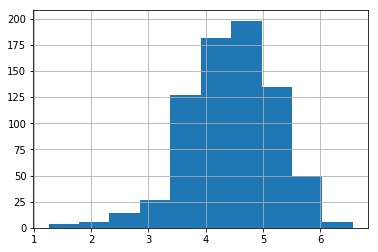

In [110]:
conditions=[(GradesDataMA1101_Wide['GRADE_c1'] <= GradesDataMA1101_Wide['GRADE_cR']), (GradesDataMA1101_Wide['GRADE_c2'] <= GradesDataMA1101_Wide['GRADE_cR']), (GradesDataMA1101_Wide['GRADE_c3'] <= GradesDataMA1101_Wide['GRADE_cR'])]
choices=[(1/6)*(GradesDataMA1101_Wide['GRADE_c2']+GradesDataMA1101_Wide['GRADE_c3']+GradesDataMA1101_Wide['GRADE_c4']+GradesDataMA1101_Wide['GRADE_c5']+GradesDataMA1101_Wide['GRADE_c6']+GradesDataMA1101_Wide['GRADE_cR']), 
         (1/6)*(GradesDataMA1101_Wide['GRADE_c1']+GradesDataMA1101_Wide['GRADE_c3']+GradesDataMA1101_Wide['GRADE_c4']+GradesDataMA1101_Wide['GRADE_c5']+GradesDataMA1101_Wide['GRADE_c6']+GradesDataMA1101_Wide['GRADE_cR']),
         (1/6)*(GradesDataMA1101_Wide['GRADE_c1']+GradesDataMA1101_Wide['GRADE_c2']+GradesDataMA1101_Wide['GRADE_c4']+GradesDataMA1101_Wide['GRADE_c5']+GradesDataMA1101_Wide['GRADE_c6']+GradesDataMA1101_Wide['GRADE_cR'])]
GradesDataMA1101_Wide['FINAL_CONTROL_GRADE'] = np.select(conditions, choices, default=(1/6)*(GradesDataMA1101_Wide['GRADE_c1']+GradesDataMA1101_Wide['GRADE_c2']+GradesDataMA1101_Wide['GRADE_c3']+GradesDataMA1101_Wide['GRADE_c4']+GradesDataMA1101_Wide['GRADE_c5']+GradesDataMA1101_Wide['GRADE_c6']))
GradesDataMA1101_Wide['GRADE_EX']=GradesDataMA1101_Wide['GRADE_EX'].fillna(1.0)
GradesDataMA1101_Wide['FINAL_GRADE'] = (0.6*GradesDataMA1101_Wide['FINAL_CONTROL_GRADE'])+(0.4*GradesDataMA1101_Wide['GRADE_EX'])
GradesDataMA1101_Wide['FINAL_GRADE'].hist()

In [115]:
FinalGradeDataSetMA1101 = FinalDataFrame.merge(GradesDataMA1101_Wide, how="inner", on="STUDENT_ID")
FinalGradeDataSetMA1101.head()
FinalGradeDataSetMA1101.to_csv("FinalGradeDataSetMA1101.csv", sep=",", index=False)

# EXTRA: REPEAT CONSTRUCTION FOR MA1001

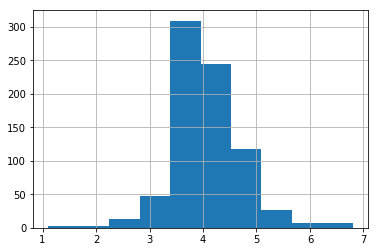

In [118]:
#2.7.2 Compute Interaction Count Features for MA1101
for key, value in MA1001_Dates.items():

    temp1_df=pd.DataFrame(total_df.index)
    #Total Counts
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    aux_df2=aux_df.groupby('STUDENT_ID', as_index=True).agg(
         Total_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         Total_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         Total_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         Total_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         Total_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         Total_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         Total_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    #2 days Earlier
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)-timedelta(days=2)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    T2_aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    T2_aux_df2=T2_aux_df.groupby('STUDENT_ID', as_index=True).agg(
         T2_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         T2_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         T2_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         T2_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         T2_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         T2_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         T2_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    
    #5 days Earlier
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)-timedelta(days=5)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    T5_aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    T5_aux_df2=T5_aux_df.groupby('STUDENT_ID', as_index=True).agg(
         T5_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         T5_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         T5_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         T5_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         T5_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         T5_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         T5_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    #10 days Earlier
    temp2_df=df_ucursos_sem1[df_ucursos_sem1['Final_Date']<pd.to_datetime(value)-timedelta(days=10)].filter(["STUDENT_ID", "INTERACTION", "INTERACTION_TYPE", "Final_Date"])
    T10_aux_df=pd.get_dummies(temp2_df, columns=['INTERACTION', 'INTERACTION_TYPE'])
    T10_aux_df2=T10_aux_df.groupby('STUDENT_ID', as_index=True).agg(
         T10_N_Academic=pd.NamedAgg(column='INTERACTION_Content_Academic', aggfunc='sum'),
         T10_N_Admin=pd.NamedAgg(column='INTERACTION_Content_Administrative', aggfunc='sum'),
         T10_N_Eval=pd.NamedAgg(column='INTERACTION_Evaluations_Interactions', aggfunc='sum'),
         T10_N_Read=pd.NamedAgg(column='INTERACTION_Read_Comment', aggfunc='sum'),
         T10_N_Write=pd.NamedAgg(column='INTERACTION_Write_Comment', aggfunc='sum'),
         T10_N_Act=pd.NamedAgg(column='INTERACTION_TYPE_Active', aggfunc='sum'),
         T10_N_Pas=pd.NamedAgg(column='INTERACTION_TYPE_Pasive', aggfunc='sum'))
    
    
    #TO DO: Compute Ratios
    
    
    if key=='C1':
        #Merge Results and Rename Columns
        C1_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C1_df.columns=C1_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='C2':
        C2_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C2_df.columns=C2_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='C3':
        C3_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C3_df.columns=C3_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
    elif key=='C4':
        C4_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C4_df.columns=C4_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
    elif key=='C5':
        C5_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C5_df.columns=C5_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='C6':
        C6_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        C6_df.columns=C6_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
    
    elif key=='CR':
        CR_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        CR_df.columns=CR_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
    elif key=='EX':
        EX_df=temp1_df.merge(aux_df2, how="left", on="STUDENT_ID").merge(T2_aux_df2, how="left", on="STUDENT_ID").merge(T5_aux_df2, how="left", on="STUDENT_ID").merge(T10_aux_df2, how="left", on="STUDENT_ID")
        EX_df.columns=EX_df.columns.map(lambda x : str(key)+'_'+x if x !='STUDENT_ID' else x)
        
# Construct Ratio Features #
C1_df['C1_T2_Ratio_Academic'] = C1_df['C1_T2_N_Academic']/C1_df['C1_Total_N_Academic']
C1_df['C1_T5_Ratio_Academic'] = C1_df['C1_T5_N_Academic']/C1_df['C1_Total_N_Academic']
C1_df['C1_T10_Ratio_Academic'] = C1_df['C1_T10_N_Academic']/C1_df['C1_Total_N_Academic']

C1_df['C1_T2_Ratio_Admin'] = C1_df['C1_T2_N_Admin']/C1_df['C1_Total_N_Admin']
C1_df['C1_T5_Ratio_Admin'] = C1_df['C1_T5_N_Admin']/C1_df['C1_Total_N_Admin']
C1_df['C1_T10_Ratio_Admin'] = C1_df['C1_T10_N_Admin']/C1_df['C1_Total_N_Admin']

C1_df['C1_T2_Ratio_Eval'] = C1_df['C1_T2_N_Eval']/C1_df['C1_Total_N_Eval']
C1_df['C1_T5_Ratio_Eval'] = C1_df['C1_T5_N_Eval']/C1_df['C1_Total_N_Eval']
C1_df['C1_T10_Ratio_Eval'] = C1_df['C1_T10_N_Eval']/C1_df['C1_Total_N_Eval']

C1_df['C1_T2_Ratio_Read'] = C1_df['C1_T2_N_Read']/C1_df['C1_Total_N_Read']
C1_df['C1_T5_Ratio_Read'] = C1_df['C1_T5_N_Read']/C1_df['C1_Total_N_Read']
C1_df['C1_T10_Ratio_Read'] = C1_df['C1_T10_N_Read']/C1_df['C1_Total_N_Read']

C1_df['C1_T2_Ratio_Write'] = C1_df['C1_T2_N_Write']/C1_df['C1_Total_N_Write']
C1_df['C1_T5_Ratio_Write'] = C1_df['C1_T5_N_Write']/C1_df['C1_Total_N_Write']
C1_df['C1_T10_Ratio_Write'] = C1_df['C1_T10_N_Write']/C1_df['C1_Total_N_Write']

C1_df['C1_T2_Ratio_Act'] = C1_df['C1_T2_N_Act']/C1_df['C1_Total_N_Act']
C1_df['C1_T5_Ratio_Act'] = C1_df['C1_T5_N_Act']/C1_df['C1_Total_N_Act']
C1_df['C1_T10_Ratio_Act'] = C1_df['C1_T10_N_Act']/C1_df['C1_Total_N_Act']

C1_df['C1_T2_Ratio_Pas'] = C1_df['C1_T2_N_Pas']/C1_df['C1_Total_N_Pas']
C1_df['C1_T5_Ratio_Pas'] = C1_df['C1_T5_N_Pas']/C1_df['C1_Total_N_Pas']
C1_df['C1_T10_Ratio_Pas'] = C1_df['C1_T10_N_Pas']/C1_df['C1_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C1_T2_Ratio_Academic', 'C1_T5_Ratio_Academic', 'C1_T10_Ratio_Academic',
             'C1_T2_Ratio_Admin', 'C1_T5_Ratio_Admin', 'C1_T10_Ratio_Admin',
             'C1_T2_Ratio_Eval', 'C1_T5_Ratio_Eval', 'C1_T10_Ratio_Eval',
             'C1_T2_Ratio_Read', 'C1_T5_Ratio_Read', 'C1_T10_Ratio_Read',
             'C1_T2_Ratio_Write', 'C1_T5_Ratio_Write', 'C1_T10_Ratio_Write',
             'C1_T2_Ratio_Act', 'C1_T5_Ratio_Act', 'C1_T10_Ratio_Act',
             'C1_T2_Ratio_Pas', 'C1_T5_Ratio_Pas', 'C1_T10_Ratio_Pas'
           ]

# Final DataFrame #
C1_df_final = C1_df[features]

### Ratios for C2 ###

# Construct Ratio Features #
C2_df['C2_T2_Ratio_Academic'] = C2_df['C2_T2_N_Academic']/C2_df['C2_Total_N_Academic']
C2_df['C2_T5_Ratio_Academic'] = C2_df['C2_T5_N_Academic']/C2_df['C2_Total_N_Academic']
C2_df['C2_T10_Ratio_Academic'] = C2_df['C2_T10_N_Academic']/C2_df['C2_Total_N_Academic']

C2_df['C2_T2_Ratio_Admin'] = C2_df['C2_T2_N_Admin']/C2_df['C2_Total_N_Admin']
C2_df['C2_T5_Ratio_Admin'] = C2_df['C2_T5_N_Admin']/C2_df['C2_Total_N_Admin']
C2_df['C2_T10_Ratio_Admin'] = C2_df['C2_T10_N_Admin']/C2_df['C2_Total_N_Admin']

C2_df['C2_T2_Ratio_Eval'] = C2_df['C2_T2_N_Eval']/C2_df['C2_Total_N_Eval']
C2_df['C2_T5_Ratio_Eval'] = C2_df['C2_T5_N_Eval']/C2_df['C2_Total_N_Eval']
C2_df['C2_T10_Ratio_Eval'] = C2_df['C2_T10_N_Eval']/C2_df['C2_Total_N_Eval']

C2_df['C2_T2_Ratio_Read'] = C2_df['C2_T2_N_Read']/C2_df['C2_Total_N_Read']
C2_df['C2_T5_Ratio_Read'] = C2_df['C2_T5_N_Read']/C2_df['C2_Total_N_Read']
C2_df['C2_T10_Ratio_Read'] = C2_df['C2_T10_N_Read']/C2_df['C2_Total_N_Read']

C2_df['C2_T2_Ratio_Write'] = C2_df['C2_T2_N_Write']/C2_df['C2_Total_N_Write']
C2_df['C2_T5_Ratio_Write'] = C2_df['C2_T5_N_Write']/C2_df['C2_Total_N_Write']
C2_df['C2_T10_Ratio_Write'] = C2_df['C2_T10_N_Write']/C2_df['C2_Total_N_Write']

C2_df['C2_T2_Ratio_Act'] = C2_df['C2_T2_N_Act']/C2_df['C2_Total_N_Act']
C2_df['C2_T5_Ratio_Act'] = C2_df['C2_T5_N_Act']/C2_df['C2_Total_N_Act']
C2_df['C2_T10_Ratio_Act'] = C2_df['C2_T10_N_Act']/C2_df['C2_Total_N_Act']

C2_df['C2_T2_Ratio_Pas'] = C2_df['C2_T2_N_Pas']/C2_df['C2_Total_N_Pas']
C2_df['C2_T5_Ratio_Pas'] = C2_df['C2_T5_N_Pas']/C2_df['C2_Total_N_Pas']
C2_df['C2_T10_Ratio_Pas'] = C2_df['C2_T10_N_Pas']/C2_df['C2_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C2_T2_Ratio_Academic', 'C2_T5_Ratio_Academic', 'C2_T10_Ratio_Academic',
             'C2_T2_Ratio_Admin', 'C2_T5_Ratio_Admin', 'C2_T10_Ratio_Admin',
             'C2_T2_Ratio_Eval', 'C2_T5_Ratio_Eval', 'C2_T10_Ratio_Eval',
             'C2_T2_Ratio_Read', 'C2_T5_Ratio_Read', 'C2_T10_Ratio_Read',
             'C2_T2_Ratio_Write', 'C2_T5_Ratio_Write', 'C2_T10_Ratio_Write',
             'C2_T2_Ratio_Act', 'C2_T5_Ratio_Act', 'C2_T10_Ratio_Act',
             'C2_T2_Ratio_Pas', 'C2_T5_Ratio_Pas', 'C2_T10_Ratio_Pas'
           ]

# Final DataFrame #
C2_df_final = C2_df[features]

### Ratios for C3 ###

# Construct Ratio Features #
C3_df['C3_T2_Ratio_Academic'] = C3_df['C3_T2_N_Academic']/C3_df['C3_Total_N_Academic']
C3_df['C3_T5_Ratio_Academic'] = C3_df['C3_T5_N_Academic']/C3_df['C3_Total_N_Academic']
C3_df['C3_T10_Ratio_Academic'] = C3_df['C3_T10_N_Academic']/C3_df['C3_Total_N_Academic']

C3_df['C3_T2_Ratio_Admin'] = C3_df['C3_T2_N_Admin']/C3_df['C3_Total_N_Admin']
C3_df['C3_T5_Ratio_Admin'] = C3_df['C3_T5_N_Admin']/C3_df['C3_Total_N_Admin']
C3_df['C3_T10_Ratio_Admin'] = C3_df['C3_T10_N_Admin']/C3_df['C3_Total_N_Admin']

C3_df['C3_T2_Ratio_Eval'] = C3_df['C3_T2_N_Eval']/C3_df['C3_Total_N_Eval']
C3_df['C3_T5_Ratio_Eval'] = C3_df['C3_T5_N_Eval']/C3_df['C3_Total_N_Eval']
C3_df['C3_T10_Ratio_Eval'] = C3_df['C3_T10_N_Eval']/C3_df['C3_Total_N_Eval']

C3_df['C3_T2_Ratio_Read'] = C3_df['C3_T2_N_Read']/C3_df['C3_Total_N_Read']
C3_df['C3_T5_Ratio_Read'] = C3_df['C3_T5_N_Read']/C3_df['C3_Total_N_Read']
C3_df['C3_T10_Ratio_Read'] = C3_df['C3_T10_N_Read']/C3_df['C3_Total_N_Read']

C3_df['C3_T2_Ratio_Write'] = C3_df['C3_T2_N_Write']/C3_df['C3_Total_N_Write']
C3_df['C3_T5_Ratio_Write'] = C3_df['C3_T5_N_Write']/C3_df['C3_Total_N_Write']
C3_df['C3_T10_Ratio_Write'] = C3_df['C3_T10_N_Write']/C3_df['C3_Total_N_Write']

C3_df['C3_T2_Ratio_Act'] = C3_df['C3_T2_N_Act']/C3_df['C3_Total_N_Act']
C3_df['C3_T5_Ratio_Act'] = C3_df['C3_T5_N_Act']/C3_df['C3_Total_N_Act']
C3_df['C3_T10_Ratio_Act'] = C3_df['C3_T10_N_Act']/C3_df['C3_Total_N_Act']

C3_df['C3_T2_Ratio_Pas'] = C3_df['C3_T2_N_Pas']/C3_df['C3_Total_N_Pas']
C3_df['C3_T5_Ratio_Pas'] = C3_df['C3_T5_N_Pas']/C3_df['C3_Total_N_Pas']
C3_df['C3_T10_Ratio_Pas'] = C3_df['C3_T10_N_Pas']/C3_df['C3_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C3_T2_Ratio_Academic', 'C3_T5_Ratio_Academic', 'C3_T10_Ratio_Academic',
             'C3_T2_Ratio_Admin', 'C3_T5_Ratio_Admin', 'C3_T10_Ratio_Admin',
             'C3_T2_Ratio_Eval', 'C3_T5_Ratio_Eval', 'C3_T10_Ratio_Eval',
             'C3_T2_Ratio_Read', 'C3_T5_Ratio_Read', 'C3_T10_Ratio_Read',
             'C3_T2_Ratio_Write', 'C3_T5_Ratio_Write', 'C3_T10_Ratio_Write',
             'C3_T2_Ratio_Act', 'C3_T5_Ratio_Act', 'C3_T10_Ratio_Act',
             'C3_T2_Ratio_Pas', 'C3_T5_Ratio_Pas', 'C3_T10_Ratio_Pas'
           ]

# Final DataFrame #
C3_df_final = C3_df[features]

### Ratios for C4 ###

# Construct Ratio Features #
C4_df['C4_T2_Ratio_Academic'] = C4_df['C4_T2_N_Academic']/C4_df['C4_Total_N_Academic']
C4_df['C4_T5_Ratio_Academic'] = C4_df['C4_T5_N_Academic']/C4_df['C4_Total_N_Academic']
C4_df['C4_T10_Ratio_Academic'] = C4_df['C4_T10_N_Academic']/C4_df['C4_Total_N_Academic']

C4_df['C4_T2_Ratio_Admin'] = C4_df['C4_T2_N_Admin']/C4_df['C4_Total_N_Admin']
C4_df['C4_T5_Ratio_Admin'] = C4_df['C4_T5_N_Admin']/C4_df['C4_Total_N_Admin']
C4_df['C4_T10_Ratio_Admin'] = C4_df['C4_T10_N_Admin']/C4_df['C4_Total_N_Admin']

C4_df['C4_T2_Ratio_Eval'] = C4_df['C4_T2_N_Eval']/C4_df['C4_Total_N_Eval']
C4_df['C4_T5_Ratio_Eval'] = C4_df['C4_T5_N_Eval']/C4_df['C4_Total_N_Eval']
C4_df['C4_T10_Ratio_Eval'] = C4_df['C4_T10_N_Eval']/C4_df['C4_Total_N_Eval']

C4_df['C4_T2_Ratio_Read'] = C4_df['C4_T2_N_Read']/C4_df['C4_Total_N_Read']
C4_df['C4_T5_Ratio_Read'] = C4_df['C4_T5_N_Read']/C4_df['C4_Total_N_Read']
C4_df['C4_T10_Ratio_Read'] = C4_df['C4_T10_N_Read']/C4_df['C4_Total_N_Read']

C4_df['C4_T2_Ratio_Write'] = C4_df['C4_T2_N_Write']/C4_df['C4_Total_N_Write']
C4_df['C4_T5_Ratio_Write'] = C4_df['C4_T5_N_Write']/C4_df['C4_Total_N_Write']
C4_df['C4_T10_Ratio_Write'] = C4_df['C4_T10_N_Write']/C4_df['C4_Total_N_Write']

C4_df['C4_T2_Ratio_Act'] = C4_df['C4_T2_N_Act']/C4_df['C4_Total_N_Act']
C4_df['C4_T5_Ratio_Act'] = C4_df['C4_T5_N_Act']/C4_df['C4_Total_N_Act']
C4_df['C4_T10_Ratio_Act'] = C4_df['C4_T10_N_Act']/C4_df['C4_Total_N_Act']

C4_df['C4_T2_Ratio_Pas'] = C4_df['C4_T2_N_Pas']/C4_df['C4_Total_N_Pas']
C4_df['C4_T5_Ratio_Pas'] = C4_df['C4_T5_N_Pas']/C4_df['C4_Total_N_Pas']
C4_df['C4_T10_Ratio_Pas'] = C4_df['C4_T10_N_Pas']/C4_df['C4_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C4_T2_Ratio_Academic', 'C4_T5_Ratio_Academic', 'C4_T10_Ratio_Academic',
             'C4_T2_Ratio_Admin', 'C4_T5_Ratio_Admin', 'C4_T10_Ratio_Admin',
             'C4_T2_Ratio_Eval', 'C4_T5_Ratio_Eval', 'C4_T10_Ratio_Eval',
             'C4_T2_Ratio_Read', 'C4_T5_Ratio_Read', 'C4_T10_Ratio_Read',
             'C4_T2_Ratio_Write', 'C4_T5_Ratio_Write', 'C4_T10_Ratio_Write',
             'C4_T2_Ratio_Act', 'C4_T5_Ratio_Act', 'C4_T10_Ratio_Act',
             'C4_T2_Ratio_Pas', 'C4_T5_Ratio_Pas', 'C4_T10_Ratio_Pas'
           ]

# Final DataFrame #
C4_df_final = C4_df[features]

### Ratios for C5 ###

# Construct Ratio Features #
C5_df['C5_T2_Ratio_Academic'] = C5_df['C5_T2_N_Academic']/C5_df['C5_Total_N_Academic']
C5_df['C5_T5_Ratio_Academic'] = C5_df['C5_T5_N_Academic']/C5_df['C5_Total_N_Academic']
C5_df['C5_T10_Ratio_Academic'] = C5_df['C5_T10_N_Academic']/C5_df['C5_Total_N_Academic']

C5_df['C5_T2_Ratio_Admin'] = C5_df['C5_T2_N_Admin']/C5_df['C5_Total_N_Admin']
C5_df['C5_T5_Ratio_Admin'] = C5_df['C5_T5_N_Admin']/C5_df['C5_Total_N_Admin']
C5_df['C5_T10_Ratio_Admin'] = C5_df['C5_T10_N_Admin']/C5_df['C5_Total_N_Admin']

C5_df['C5_T2_Ratio_Eval'] = C5_df['C5_T2_N_Eval']/C5_df['C5_Total_N_Eval']
C5_df['C5_T5_Ratio_Eval'] = C5_df['C5_T5_N_Eval']/C5_df['C5_Total_N_Eval']
C5_df['C5_T10_Ratio_Eval'] = C5_df['C5_T10_N_Eval']/C5_df['C5_Total_N_Eval']

C5_df['C5_T2_Ratio_Read'] = C5_df['C5_T2_N_Read']/C5_df['C5_Total_N_Read']
C5_df['C5_T5_Ratio_Read'] = C5_df['C5_T5_N_Read']/C5_df['C5_Total_N_Read']
C5_df['C5_T10_Ratio_Read'] = C5_df['C5_T10_N_Read']/C5_df['C5_Total_N_Read']

C5_df['C5_T2_Ratio_Write'] = C5_df['C5_T2_N_Write']/C5_df['C5_Total_N_Write']
C5_df['C5_T5_Ratio_Write'] = C5_df['C5_T5_N_Write']/C5_df['C5_Total_N_Write']
C5_df['C5_T10_Ratio_Write'] = C5_df['C5_T10_N_Write']/C5_df['C5_Total_N_Write']

C5_df['C5_T2_Ratio_Act'] = C5_df['C5_T2_N_Act']/C5_df['C5_Total_N_Act']
C5_df['C5_T5_Ratio_Act'] = C5_df['C5_T5_N_Act']/C5_df['C5_Total_N_Act']
C5_df['C5_T10_Ratio_Act'] = C5_df['C5_T10_N_Act']/C5_df['C5_Total_N_Act']

C5_df['C5_T2_Ratio_Pas'] = C5_df['C5_T2_N_Pas']/C5_df['C5_Total_N_Pas']
C5_df['C5_T5_Ratio_Pas'] = C5_df['C5_T5_N_Pas']/C5_df['C5_Total_N_Pas']
C5_df['C5_T10_Ratio_Pas'] = C5_df['C5_T10_N_Pas']/C5_df['C5_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C5_T2_Ratio_Academic', 'C5_T5_Ratio_Academic', 'C5_T10_Ratio_Academic',
             'C5_T2_Ratio_Admin', 'C5_T5_Ratio_Admin', 'C5_T10_Ratio_Admin',
             'C5_T2_Ratio_Eval', 'C5_T5_Ratio_Eval', 'C5_T10_Ratio_Eval',
             'C5_T2_Ratio_Read', 'C5_T5_Ratio_Read', 'C5_T10_Ratio_Read',
             'C5_T2_Ratio_Write', 'C5_T5_Ratio_Write', 'C5_T10_Ratio_Write',
             'C5_T2_Ratio_Act', 'C5_T5_Ratio_Act', 'C5_T10_Ratio_Act',
             'C5_T2_Ratio_Pas', 'C5_T5_Ratio_Pas', 'C5_T10_Ratio_Pas'
           ]

# Final DataFrame #
C5_df_final = C5_df[features]

### Ratios for C6 ###

# Construct Ratio Features #
C6_df['C6_T2_Ratio_Academic'] = C6_df['C6_T2_N_Academic']/C6_df['C6_Total_N_Academic']
C6_df['C6_T5_Ratio_Academic'] = C6_df['C6_T5_N_Academic']/C6_df['C6_Total_N_Academic']
C6_df['C6_T10_Ratio_Academic'] = C6_df['C6_T10_N_Academic']/C6_df['C6_Total_N_Academic']

C6_df['C6_T2_Ratio_Admin'] = C6_df['C6_T2_N_Admin']/C6_df['C6_Total_N_Admin']
C6_df['C6_T5_Ratio_Admin'] = C6_df['C6_T5_N_Admin']/C6_df['C6_Total_N_Admin']
C6_df['C6_T10_Ratio_Admin'] = C6_df['C6_T10_N_Admin']/C6_df['C6_Total_N_Admin']

C6_df['C6_T2_Ratio_Eval'] = C6_df['C6_T2_N_Eval']/C6_df['C6_Total_N_Eval']
C6_df['C6_T5_Ratio_Eval'] = C6_df['C6_T5_N_Eval']/C6_df['C6_Total_N_Eval']
C6_df['C6_T10_Ratio_Eval'] = C6_df['C6_T10_N_Eval']/C6_df['C6_Total_N_Eval']

C6_df['C6_T2_Ratio_Read'] = C6_df['C6_T2_N_Read']/C6_df['C6_Total_N_Read']
C6_df['C6_T5_Ratio_Read'] = C6_df['C6_T5_N_Read']/C6_df['C6_Total_N_Read']
C6_df['C6_T10_Ratio_Read'] = C6_df['C6_T10_N_Read']/C6_df['C6_Total_N_Read']

C6_df['C6_T2_Ratio_Write'] = C6_df['C6_T2_N_Write']/C6_df['C6_Total_N_Write']
C6_df['C6_T5_Ratio_Write'] = C6_df['C6_T5_N_Write']/C6_df['C6_Total_N_Write']
C6_df['C6_T10_Ratio_Write'] = C6_df['C6_T10_N_Write']/C6_df['C6_Total_N_Write']

C6_df['C6_T2_Ratio_Act'] = C6_df['C6_T2_N_Act']/C6_df['C6_Total_N_Act']
C6_df['C6_T5_Ratio_Act'] = C6_df['C6_T5_N_Act']/C6_df['C6_Total_N_Act']
C6_df['C6_T10_Ratio_Act'] = C6_df['C6_T10_N_Act']/C6_df['C6_Total_N_Act']

C6_df['C6_T2_Ratio_Pas'] = C6_df['C6_T2_N_Pas']/C6_df['C6_Total_N_Pas']
C6_df['C6_T5_Ratio_Pas'] = C6_df['C6_T5_N_Pas']/C6_df['C6_Total_N_Pas']
C6_df['C6_T10_Ratio_Pas'] = C6_df['C6_T10_N_Pas']/C6_df['C6_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'C6_T2_Ratio_Academic', 'C6_T5_Ratio_Academic', 'C6_T10_Ratio_Academic',
             'C6_T2_Ratio_Admin', 'C6_T5_Ratio_Admin', 'C6_T10_Ratio_Admin',
             'C6_T2_Ratio_Eval', 'C6_T5_Ratio_Eval', 'C6_T10_Ratio_Eval',
             'C6_T2_Ratio_Read', 'C6_T5_Ratio_Read', 'C6_T10_Ratio_Read',
             'C6_T2_Ratio_Write', 'C6_T5_Ratio_Write', 'C6_T10_Ratio_Write',
             'C6_T2_Ratio_Act', 'C6_T5_Ratio_Act', 'C6_T10_Ratio_Act',
             'C6_T2_Ratio_Pas', 'C6_T5_Ratio_Pas', 'C6_T10_Ratio_Pas'
           ]

# Final DataFrame #
C6_df_final = C6_df[features]

### Ratios for CR ###

# Construct Ratio Features #
CR_df['CR_T2_Ratio_Academic'] = CR_df['CR_T2_N_Academic']/CR_df['CR_Total_N_Academic']
CR_df['CR_T5_Ratio_Academic'] = CR_df['CR_T5_N_Academic']/CR_df['CR_Total_N_Academic']
CR_df['CR_T10_Ratio_Academic'] = CR_df['CR_T10_N_Academic']/CR_df['CR_Total_N_Academic']

CR_df['CR_T2_Ratio_Admin'] = CR_df['CR_T2_N_Admin']/CR_df['CR_Total_N_Admin']
CR_df['CR_T5_Ratio_Admin'] = CR_df['CR_T5_N_Admin']/CR_df['CR_Total_N_Admin']
CR_df['CR_T10_Ratio_Admin'] = CR_df['CR_T10_N_Admin']/CR_df['CR_Total_N_Admin']

CR_df['CR_T2_Ratio_Eval'] = CR_df['CR_T2_N_Eval']/CR_df['CR_Total_N_Eval']
CR_df['CR_T5_Ratio_Eval'] = CR_df['CR_T5_N_Eval']/CR_df['CR_Total_N_Eval']
CR_df['CR_T10_Ratio_Eval'] = CR_df['CR_T10_N_Eval']/CR_df['CR_Total_N_Eval']

CR_df['CR_T2_Ratio_Read'] = CR_df['CR_T2_N_Read']/CR_df['CR_Total_N_Read']
CR_df['CR_T5_Ratio_Read'] = CR_df['CR_T5_N_Read']/CR_df['CR_Total_N_Read']
CR_df['CR_T10_Ratio_Read'] = CR_df['CR_T10_N_Read']/CR_df['CR_Total_N_Read']

CR_df['CR_T2_Ratio_Write'] = CR_df['CR_T2_N_Write']/CR_df['CR_Total_N_Write']
CR_df['CR_T5_Ratio_Write'] = CR_df['CR_T5_N_Write']/CR_df['CR_Total_N_Write']
CR_df['CR_T10_Ratio_Write'] = CR_df['CR_T10_N_Write']/CR_df['CR_Total_N_Write']

CR_df['CR_T2_Ratio_Act'] = CR_df['CR_T2_N_Act']/CR_df['CR_Total_N_Act']
CR_df['CR_T5_Ratio_Act'] = CR_df['CR_T5_N_Act']/CR_df['CR_Total_N_Act']
CR_df['CR_T10_Ratio_Act'] = CR_df['CR_T10_N_Act']/CR_df['CR_Total_N_Act']

CR_df['CR_T2_Ratio_Pas'] = CR_df['CR_T2_N_Pas']/CR_df['CR_Total_N_Pas']
CR_df['CR_T5_Ratio_Pas'] = CR_df['CR_T5_N_Pas']/CR_df['CR_Total_N_Pas']
CR_df['CR_T10_Ratio_Pas'] = CR_df['CR_T10_N_Pas']/CR_df['CR_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'CR_T2_Ratio_Academic', 'CR_T5_Ratio_Academic', 'CR_T10_Ratio_Academic',
             'CR_T2_Ratio_Admin', 'CR_T5_Ratio_Admin', 'CR_T10_Ratio_Admin',
             'CR_T2_Ratio_Eval', 'CR_T5_Ratio_Eval', 'CR_T10_Ratio_Eval',
             'CR_T2_Ratio_Read', 'CR_T5_Ratio_Read', 'CR_T10_Ratio_Read',
             'CR_T2_Ratio_Write', 'CR_T5_Ratio_Write', 'CR_T10_Ratio_Write',
             'CR_T2_Ratio_Act', 'CR_T5_Ratio_Act', 'CR_T10_Ratio_Act',
             'CR_T2_Ratio_Pas', 'CR_T5_Ratio_Pas', 'CR_T10_Ratio_Pas'
           ]

# Final DataFrame #
CR_df_final = CR_df[features]

### Ratios for EX ###

# Construct Ratio Features #
EX_df['EX_T2_Ratio_Academic'] = EX_df['EX_T2_N_Academic']/EX_df['EX_Total_N_Academic']
EX_df['EX_T5_Ratio_Academic'] = EX_df['EX_T5_N_Academic']/EX_df['EX_Total_N_Academic']
EX_df['EX_T10_Ratio_Academic'] = EX_df['EX_T10_N_Academic']/EX_df['EX_Total_N_Academic']

EX_df['EX_T2_Ratio_Admin'] = EX_df['EX_T2_N_Admin']/EX_df['EX_Total_N_Admin']
EX_df['EX_T5_Ratio_Admin'] = EX_df['EX_T5_N_Admin']/EX_df['EX_Total_N_Admin']
EX_df['EX_T10_Ratio_Admin'] = EX_df['EX_T10_N_Admin']/EX_df['EX_Total_N_Admin']

EX_df['EX_T2_Ratio_Eval'] = EX_df['EX_T2_N_Eval']/EX_df['EX_Total_N_Eval']
EX_df['EX_T5_Ratio_Eval'] = EX_df['EX_T5_N_Eval']/EX_df['EX_Total_N_Eval']
EX_df['EX_T10_Ratio_Eval'] = EX_df['EX_T10_N_Eval']/EX_df['EX_Total_N_Eval']

EX_df['EX_T2_Ratio_Read'] = EX_df['EX_T2_N_Read']/EX_df['EX_Total_N_Read']
EX_df['EX_T5_Ratio_Read'] = EX_df['EX_T5_N_Read']/EX_df['EX_Total_N_Read']
EX_df['EX_T10_Ratio_Read'] = EX_df['EX_T10_N_Read']/EX_df['EX_Total_N_Read']

EX_df['EX_T2_Ratio_Write'] = EX_df['EX_T2_N_Write']/EX_df['EX_Total_N_Write']
EX_df['EX_T5_Ratio_Write'] = EX_df['EX_T5_N_Write']/EX_df['EX_Total_N_Write']
EX_df['EX_T10_Ratio_Write'] = EX_df['EX_T10_N_Write']/EX_df['EX_Total_N_Write']

EX_df['EX_T2_Ratio_Act'] = EX_df['EX_T2_N_Act']/EX_df['EX_Total_N_Act']
EX_df['EX_T5_Ratio_Act'] = EX_df['EX_T5_N_Act']/EX_df['EX_Total_N_Act']
EX_df['EX_T10_Ratio_Act'] = EX_df['EX_T10_N_Act']/EX_df['EX_Total_N_Act']

EX_df['EX_T2_Ratio_Pas'] = EX_df['EX_T2_N_Pas']/EX_df['EX_Total_N_Pas']
EX_df['EX_T5_Ratio_Pas'] = EX_df['EX_T5_N_Pas']/EX_df['EX_Total_N_Pas']
EX_df['EX_T10_Ratio_Pas'] = EX_df['EX_T10_N_Pas']/EX_df['EX_Total_N_Pas']

# Generate Feature Array #
features = [ 'STUDENT_ID',
             'EX_T2_Ratio_Academic', 'EX_T5_Ratio_Academic', 'EX_T10_Ratio_Academic',
             'EX_T2_Ratio_Admin', 'EX_T5_Ratio_Admin', 'EX_T10_Ratio_Admin',
             'EX_T2_Ratio_Eval', 'EX_T5_Ratio_Eval', 'EX_T10_Ratio_Eval',
             'EX_T2_Ratio_Read', 'EX_T5_Ratio_Read', 'EX_T10_Ratio_Read',
             'EX_T2_Ratio_Write', 'EX_T5_Ratio_Write', 'EX_T10_Ratio_Write',
             'EX_T2_Ratio_Act', 'EX_T5_Ratio_Act', 'EX_T10_Ratio_Act',
             'EX_T2_Ratio_Pas', 'EX_T5_Ratio_Pas', 'EX_T10_Ratio_Pas'
           ]

# Final DataFrame #
EX_df_final = EX_df[features]

from functools import reduce
dfs = [C1_df_final, C2_df_final, C3_df_final, C4_df_final, C5_df_final, C6_df_final, CR_df_final, EX_df_final]
FinalDataFrame = reduce(lambda left,right: pd.merge(left,right,on='STUDENT_ID'), dfs)
FinalDataFrame.head() 
FinalDataFrame.to_csv("MA1001_DataFrame.csv", sep=",", index=False)

# Generate Grades Target #
EVALUATIONS = ['Control 1', 'Control 2', 'Control 3', 'Control Recuperativo', 'Control 4', 'Control 5', 'Control 6', 'Examen']
GradesDataMA1001[GradesDataMA1001['EVALUATION_DESCRIPTION'].isin(EVALUATIONS)]
GradesDataMA1001_Wide = pd.pivot_table(GradesDataMA1001[GradesDataMA1001['EVALUATION_DESCRIPTION'].isin(EVALUATIONS)], index = ['STUDENT_ID', 'COURSE_CODE'], columns = 'EVALUATION_DESCRIPTION', values = 'GRADE').reset_index()
GradesDataMA1001_Wide.columns = ['STUDENT_ID', 'COURSE_CODE', 'GRADE_c1', 'GRADE_c2', 'GRADE_c3','GRADE_c4', 'GRADE_c5', 'GRADE_c6', 'GRADE_cR', 'GRADE_EX']


conditions=[(GradesDataMA1001_Wide['GRADE_c1'] <= GradesDataMA1001_Wide['GRADE_cR']), (GradesDataMA1001_Wide['GRADE_c2'] <= GradesDataMA1001_Wide['GRADE_cR']), (GradesDataMA1001_Wide['GRADE_c3'] <= GradesDataMA1001_Wide['GRADE_cR'])]
choices=[(1/6)*(GradesDataMA1001_Wide['GRADE_c2']+GradesDataMA1001_Wide['GRADE_c3']+GradesDataMA1001_Wide['GRADE_c4']+GradesDataMA1001_Wide['GRADE_c5']+GradesDataMA1001_Wide['GRADE_c6']+GradesDataMA1001_Wide['GRADE_cR']), 
         (1/6)*(GradesDataMA1001_Wide['GRADE_c1']+GradesDataMA1001_Wide['GRADE_c3']+GradesDataMA1001_Wide['GRADE_c4']+GradesDataMA1001_Wide['GRADE_c5']+GradesDataMA1001_Wide['GRADE_c6']+GradesDataMA1001_Wide['GRADE_cR']),
         (1/6)*(GradesDataMA1001_Wide['GRADE_c1']+GradesDataMA1001_Wide['GRADE_c2']+GradesDataMA1001_Wide['GRADE_c4']+GradesDataMA1001_Wide['GRADE_c5']+GradesDataMA1001_Wide['GRADE_c6']+GradesDataMA1001_Wide['GRADE_cR'])]
GradesDataMA1001_Wide['FINAL_CONTROL_GRADE'] = np.select(conditions, choices, default=(1/6)*(GradesDataMA1001_Wide['GRADE_c1']+GradesDataMA1001_Wide['GRADE_c2']+GradesDataMA1001_Wide['GRADE_c3']+GradesDataMA1001_Wide['GRADE_c4']+GradesDataMA1001_Wide['GRADE_c5']+GradesDataMA1001_Wide['GRADE_c6']))
GradesDataMA1001_Wide['GRADE_EX']=GradesDataMA1001_Wide['GRADE_EX'].fillna(1.0)
GradesDataMA1001_Wide['FINAL_GRADE'] = (0.6*GradesDataMA1001_Wide['FINAL_CONTROL_GRADE'])+(0.4*GradesDataMA1001_Wide['GRADE_EX'])
GradesDataMA1001_Wide['FINAL_GRADE'].hist()

FinalGradeDataSetMA1001 = FinalDataFrame.merge(GradesDataMA1001_Wide, how="inner", on="STUDENT_ID")
FinalGradeDataSetMA1001.head()
FinalGradeDataSetMA1001.to_csv("FinalGradeDataSetMA1001.csv", sep=",", index=False)

In [119]:
FinalGradeDataSetMA1001.shape

(860, 180)

# 4. RUN CLUSTERING APPROACHES!

In [55]:
### 3.1 Impute Missing Values
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
X = FinalDataFrame.drop(['STUDENT_ID'], axis=1 )

In [56]:
# Scale Data Set!
# Add logarithmic transformation
scaler_robust = preprocessing.RobustScaler()
scaler_minmax = preprocessing.MinMaxScaler()
robust_scaled_X = scaler_robust.fit_transform(X)
minmax_scaled_X = scaler_minmax.fit_transform(X)

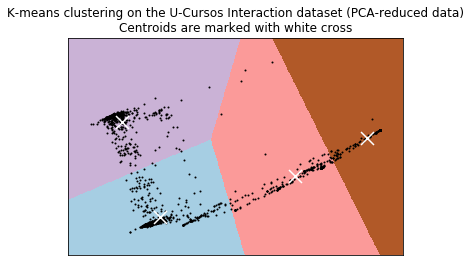

In [69]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the U-Cursos Interaction dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

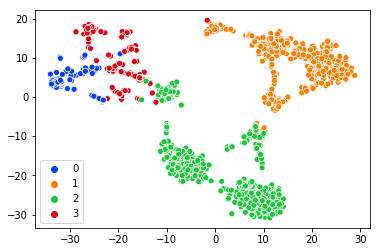

In [71]:
from sklearn.manifold import TSNE
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
palette = sns.color_palette("bright", 4)

tsne = TSNE(n_components=2, perplexity=50, early_exaggeration=50, learning_rate=15)
X_embedded = tsne.fit_transform(minmax_scaled_X)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_kmeans, legend='full', palette=palette)